In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import nltk
import string
import re
from spellchecker import SpellChecker

In [2]:
county_till_2016 = pd.read_csv('raw_data/countypres_2000-2016.csv')
county_2020 = pd.read_csv('raw_data/2020_US_County_Level_Presidential_Results.csv')
county_2020 = county_2020[['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem', 'total_votes']]
county_2020 = county_2020.rename(columns = {'state_name': 'state','county_name':'county','county_fips': 'FIPS'})
county_2020.head()

state  FIPS          county  votes_gop  votes_dem  total_votes
0  Alabama  1001  Autauga County      19838       7503        27770
1  Alabama  1003  Baldwin County      83544      24578       109679
2  Alabama  1005  Barbour County       5622       4816        10518
3  Alabama  1007     Bibb County       7525       1986         9595
4  Alabama  1009   Blount County      24711       2640        27588

In [3]:
county_2020.insert(loc=0, column = 'year', value = [2020 for i in range(county_2020.shape[0])])
county_2020 = county_2020[['year', 'state', 'county', 'FIPS', 'votes_dem', 'votes_gop', 'total_votes']]
county_2020.head()

year    state          county  FIPS  votes_dem  votes_gop  total_votes
0  2020  Alabama  Autauga County  1001       7503      19838        27770
1  2020  Alabama  Baldwin County  1003      24578      83544       109679
2  2020  Alabama  Barbour County  1005       4816       5622        10518
3  2020  Alabama     Bibb County  1007       1986       7525         9595
4  2020  Alabama   Blount County  1009       2640      24711        27588

In [4]:
county_till_2016 = county_till_2016[['year', 'state','county', 'FIPS', 'party', 'candidatevotes', 'totalvotes']]
county_till_2016 = county_till_2016.dropna()
county_till_2016.head()

year    state   county    FIPS       party  candidatevotes  totalvotes
0  2000  Alabama  Autauga  1001.0    democrat          4942.0       17208
1  2000  Alabama  Autauga  1001.0  republican         11993.0       17208
2  2000  Alabama  Autauga  1001.0       green           160.0       17208
4  2000  Alabama  Baldwin  1003.0    democrat         13997.0       56480
5  2000  Alabama  Baldwin  1003.0  republican         40872.0       56480

In [5]:
democrat = county_till_2016[county_till_2016['party'] == 'democrat']['candidatevotes'].reset_index().drop(['index'],axis =1)
repub = county_till_2016[county_till_2016['party'] == 'republican']['candidatevotes'].reset_index().drop(['index'],axis =1)
total_votes = county_till_2016[county_till_2016['party'] == 'democrat']['totalvotes'].reset_index().drop(['index'],axis =1)
county_till_2016_simplified = county_till_2016[county_till_2016['party'] == 'democrat'][['year', 'state','county', 'FIPS']].reset_index()
county_till_2016_simplified = county_till_2016_simplified.drop(['index'], axis = 1)
county_till_2016_simplified['votes_dem'] = democrat
county_till_2016_simplified['votes_gop'] = repub
county_till_2016_simplified['total_votes'] = total_votes
county_till_2016_simplified.head()

year    state   county    FIPS  votes_dem  votes_gop  total_votes
0  2000  Alabama  Autauga  1001.0     4942.0    11993.0        17208
1  2000  Alabama  Baldwin  1003.0    13997.0    40872.0        56480
2  2000  Alabama  Barbour  1005.0     5188.0     5096.0        10395
3  2000  Alabama     Bibb  1007.0     2710.0     4273.0         7101
4  2000  Alabama   Blount  1009.0     4977.0    12667.0        17973

In [6]:
frames = [county_till_2016_simplified, county_2020]
df = pd.concat(frames).reset_index().drop(['index'], axis =1)
#df.to_csv('merged.csv',index = False)
df2 = df[['year','state','votes_dem', 'votes_gop','total_votes']].groupby(['state','year']).sum()
#df2.to_csv('df2.csv', index = True)
states = df2.index.get_level_values(0).unique()
df2['votes_dem_perc'] = 100*df2['votes_dem']/df2['total_votes']
df2['votes_gop_perc'] = 100*df2['votes_gop']/df2['total_votes']
df2 = df2.drop(['votes_dem', 'votes_gop'], axis =1)
df2 = df2.drop(['total_votes'], axis =1)
df2.head()

votes_dem_perc  votes_gop_perc
state   year                                
Alabama 2000       41.589285       56.465184
        2004       36.844402       62.460690
        2008       38.740434       60.316913
        2012       38.432866       60.662360
        2016       34.358027       62.083003

In [7]:
ind_df_10 = pd.read_csv("raw_data/independent_expenditure_2010.csv")
ind_df_10 = ind_df_10[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
ind_df_12 = pd.read_csv("raw_data/independent_expenditure_2012.csv")
ind_df_12 = ind_df_12[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
ind_df_14 = pd.read_csv("raw_data/independent_expenditure_2014.csv")
ind_df_14 = ind_df_14[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
ind_df_16 = pd.read_csv("raw_data/independent_expenditure_2016.csv")
ind_df_16 = ind_df_16[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
ind_df_18 = pd.read_csv("raw_data/independent_expenditure_2018.csv")
ind_df_18 = ind_df_18[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
ind_df_20 = pd.read_csv("raw_data/independent_expenditure_2020.csv")
ind_df_20 = ind_df_20[['can_office_state','cand_pty_aff', 'exp_amo', 'exp_date', 'agg_amo', 'sup_opp', 'pur'
                       , 'fec_election_yr']]
frames = [ind_df_10, ind_df_12, ind_df_14,ind_df_16, ind_df_18, ind_df_20 ]
total_ind_exp = pd.concat(frames)
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
total_ind_exp = total_ind_exp.reset_index(drop = True)
total_ind_exp.head()


/Users/riteshsuhag/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/riteshsuhag/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/riteshsuhag/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


can_office_state cand_pty_aff    exp_amo   exp_date    agg_amo sup_opp  \
0               NY          NaN   98844.72  14-OCT-10   98844.72       S   
1               MA          NaN   74250.00  12-JAN-10   74250.00       S   
2               MA          NaN    7898.40  08-SEP-10  207898.40       S   
3               MA          NaN   32000.00  08-SEP-10  239898.40       S   
4               MA          NaN  150000.00  08-SEP-10  200000.00       S   

                     pur  fec_election_yr  
0                MAILERS             2010  
1             ROBO CALLS             2010  
2  LIVE PHONE BANK CALLS             2010  
3  LIVE PHONE BANK CALLS             2010  
4              RADIO ADS             2010

In [8]:
total_ind_exp['cand_pty_aff'].unique()

array([nan, 'REPUBLICAN PARTY', 'DEMOCRATIC PARTY', 'NONE',
       'DEMOCRATIC-FARMER-LABOR', 'LIBERTARIAN PARTY', 'OTHER',
       'INDEPENDENT', 'CONSERVATIVE PARTY', 'CONSTITUTION PARTY',
       'UNKNOWN', 'WRITE-IN', 'GREEN PARTY'], dtype=object)

In [78]:
# Creating a party column
# There are 13 different party affiliations, gruopingthem into republicans adn democrats -

total_ind_exp['party'] = ""

total_ind_exp['party'] = np.where(total_ind_exp['party'] == "",
                                  np.where(total_ind_exp['cand_pty_aff'] == 'DEMOCRATIC PARTY', 
                                  'Democrats', ""), total_ind_exp['party'])
total_ind_exp['party'] = np.where(total_ind_exp['party'] == "",
                                  np.where(total_ind_exp['cand_pty_aff'] == 'DEMOCRATIC-FARMER-LABOR', 
                                  'Democrats', ""), total_ind_exp['party'])
total_ind_exp['party'] = np.where(total_ind_exp['party'] == "",
                                  np.where(total_ind_exp['cand_pty_aff'] == 'REPUBLICAN PARTY', 
                                  'Republicans', ""), total_ind_exp['party'])
total_ind_exp['party'] = np.where(total_ind_exp['party'] == "",
                                  np.where(total_ind_exp['cand_pty_aff'] == 'CONSERVATIVE PARTY', 
                                  'Republicans', ""), total_ind_exp['party'])
total_ind_exp['party'] = np.where(total_ind_exp['party'] == "",
                                  np.where(total_ind_exp['cand_pty_aff'] == 'INDEPENDENT', 
                                  'Indepedents', ""), total_ind_exp['party'])

total_ind_exp.sample(10)

can_office_state      cand_pty_aff   exp_amo   exp_date    agg_amo  \
362814               OH  DEMOCRATIC PARTY     68.40  21-SEP-16  525805.93   
248105               CA  REPUBLICAN PARTY   6983.86        NaN  495283.32   
383961              NaN  REPUBLICAN PARTY     22.80  02-SEP-16  542665.27   
150269              NaN  REPUBLICAN PARTY     20.97  26-OCT-12  332292.94   
101855               PA  DEMOCRATIC PARTY     26.61  26-OCT-12   27919.04   
510610               TX  DEMOCRATIC PARTY    127.43  21-OCT-20   24372.10   
53456                WI  REPUBLICAN PARTY    533.35  01-NOV-12   43069.90   
265968               PA  REPUBLICAN PARTY  50000.00  22-APR-16   50000.00   
5923                 MA  DEMOCRATIC PARTY   1728.00  25-OCT-10    7385.60   
253829               MI  DEMOCRATIC PARTY  22175.00  20-SEP-16  418198.40   

       sup_opp                               pur  fec_election_yr  \
362814       S               Salary and Benefits             2016   
248105       O     Online Advertising - Estimate             2016   
383961       O               Salary and Benefits             2016   
150269       O                           Lodging             2012   
101855       S               Salary and Benefits             2012   
510610       S   Phone and text banking platform             2020   
53456        O                   Field Organizer             2012   
265968       S                  Social Media Buy             2016   
5923         O  Production Costs - Housewives Ad             2010   
253829       O                             MEDIA             2016   

              party                          pur_temp  
362814    Democrats               salary and benefits  
248105  Republicans     online advertising - estimate  
383961  Republicans               salary and benefits  
150269  Republicans                           lodging  
101855    Democrats               salary and benefits  
510610    Democrats   phone and text banking platform  
53456   Republicans                   field organizer  
265968  Republicans                  social media buy  
5923      Democrats  production costs - housewives ad  
253829    Democrats                             media

In [79]:
# Creating temp tables for democrats and republicans (to create initial graph) - 
# Democrats -
dem_party = total_ind_exp[total_ind_exp['party'] == 'Democrats']
dem_exp_total = dem_party.groupby(['fec_election_yr']).agg({"exp_amo" : "sum"})
dem_exp_total['exp_amo'] = round(dem_exp_total['exp_amo'] / 1000000, 4)
dem_exp_total.head(10)
# Republicans -
rep_party = total_ind_exp[total_ind_exp['party'] == 'Republicans']
rep_exp_total = rep_party.groupby(['fec_election_yr']).agg({"exp_amo" : "sum"})
rep_exp_total['exp_amo'] = round(rep_exp_total['exp_amo'] / 1000000, 4)
rep_exp_total.head(10)
# Independents - 
ind_party = total_ind_exp[total_ind_exp['party'] == 'Indepedents']
ind_exp_total = ind_party.groupby(['fec_election_yr']).agg({"exp_amo" : "sum"})
ind_exp_total['exp_amo'] = round(ind_exp_total['exp_amo'] / 1000000, 4)
ind_exp_total.head(10)
# Total expenditure - 
exp_total = total_ind_exp.groupby(['fec_election_yr']).agg({"exp_amo" : "sum"})
exp_total['exp_amo'] = round(exp_total['exp_amo'] / 1000000, 4)
exp_total.head(10)

exp_amo
fec_election_yr           
2010              392.4027
2012             1470.9545
2014              827.7582
2016             1935.7305
2018             1395.4499
2020             6229.6796

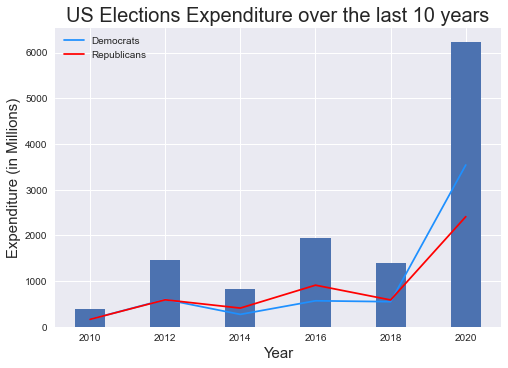

In [80]:
# Plotting the graph -
plt.style.use("seaborn")
plt.bar(exp_total.index, exp_total['exp_amo'])
plt.plot(dem_exp_total.index, dem_exp_total['exp_amo'], color = 'dodgerblue', label = "Democrats")
plt.plot(rep_exp_total.index, rep_exp_total['exp_amo'], color = 'red', label = "Republicans")
plt.title("US Elections Expenditure over the last 10 years", size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel("Expenditure (in Millions)", size = 15)
plt.legend()
plt.savefig("Initial_Overview.png")
plt.show()

In [12]:
temp = total_ind_exp.copy()

# Converting the purpose column to lower - 
temp['pur'] = temp['pur'].str.lower()

# Saving the unique values in a dataframe - 
purpose_df = temp[['pur']]
purpose_df = purpose_df.drop_duplicates(subset=['pur']).reset_index()
purpose_df.drop(['index'], axis = 1, inplace = True)

# ~~~~~~~~~~~~~~~~~ Checking the spelling - 

# pip install spellchecker
# pip install pyspellchecker

spell = SpellChecker()

def correcting_misspelled_words(user_string):
    if pd.isnull(user_string):
        pass
    else:
        user_string = re.sub('[^A-Za-z0-9]+', ' ', user_string)
        user_string = ' '.join([w for w in user_string.split() if len(w)>1])
        user_string = ' '.join([spell.correction(word) if word != 'tv' else 'tv' for word in user_string.split(' ')])
    return user_string

purpose_df['cleaned_pur'] = purpose_df['pur'].apply(correcting_misspelled_words)

# Category column - 
purpose_df['category'] = ''


# Words for Advertisement Category - 
word_list = ['ads', 'tv', 'radio', 'ad', 'media', 'production', 'newspaper', 'signs', 'print', 'prints', 'printing', 'stickers', 'sticker',
             'hangers', 'hanger', 'billboards', 'billboard', 'flyers', 'flyer', 'leaflet', 'leaflets', 'advertise', 'advertis', 'advertising',
             'advertisment', 'fliers', 'flier', 'promotional', 'signage', 'sign', 'flags']
expression = '|'.join(word_list)
y = purpose_df['cleaned_pur'].str.contains(expression)
purpose_df['category'] = np.where(purpose_df['category'] == '', 
                                  np.where(purpose_df['cleaned_pur'].str.contains(expression), 'Advertisement', ''), 
                                  purpose_df['category'])

# Words for Communications Category - 
word_list = ['calls', 'call', 'phone', 'phones', 'message', 'mssages', 'communicate', 'communication', 'communications', ' postcards', 
             'postcard', 'mail', 'mailing', 'mails', 'telemarket', 'telemarketing', 'telegram', 'telegrams', 'postage', 'letter']
expression = '|'.join(word_list)
purpose_df['category'] = np.where(purpose_df['category'] == '', 
                                  np.where(purpose_df['cleaned_pur'].str.contains(expression), 'Communications', ''), 
                                  purpose_df['category'])

# Words for Logistics Category - 
word_list = ['travel', 'traveling', 'travels', 'reimbursement', 'reimbursements', 'office', 'offices', 'supplies', 'supply', 'equipment',
             'equipments', 'rental', 'rentals', 'material', 'materials', 'transportation', 'transport', ' lodging', 'lodge', 'card', 'cards',
             'food', 'beverage', 'foods', 'beverages', 'gas', 'petrol', 'house', 'houses', 'housing', 'rent', 'travel', 'travels', 'parking',
             'park', 'internet', 'service', 'water', 'ice', 'bus', 'hotel', 'television', 'meal', 'airfare', 'taxi', 'flight', 'mileage',
             'coffee', 'donuts', 'expenses']
expression = '|'.join(word_list)
y = purpose_df['cleaned_pur'].str.contains(expression)
purpose_df['category'] = np.where(purpose_df['category'] == '', 
                                  np.where(purpose_df['cleaned_pur'].str.contains(expression), 'Logistics', ''), 
                                  purpose_df['category'])



# Words for Canvas/Campaign Category - 
word_list = ['canvasser', 'canvas', 'canvass', 'canvassed', 'canvassing', 'canvasses', 'campaign', 'research', 'consultant', 'consulting', 
             'survey', 'analysis', 'yahoo', 'estimate', 'search']
expression = '|'.join(word_list)
y = purpose_df['cleaned_pur'].str.contains(expression)
purpose_df['category'] = np.where(purpose_df['category'] == '', 
                                  np.where(purpose_df['cleaned_pur'].str.contains(expression), 'Canvas/Research', ''), 
                                  purpose_df['category'])

# Others - 
purpose_df['category'] = np.where(purpose_df['category'] == '', 'Others', purpose_df['category'])


In [13]:
total_ind_exp['sup_opp'] = total_ind_exp['sup_opp'].str.upper()
total_ind_exp['sup_opp'][total_ind_exp['sup_opp']=='0'] = 'O'
S_O_df = total_ind_exp[['exp_amo', 'sup_opp','fec_election_yr']].groupby(['sup_opp', 'fec_election_yr']).sum()
S_O_df

<ipython-input-13-888beff82cde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_ind_exp['sup_opp'][total_ind_exp['sup_opp']=='0'] = 'O'


exp_amo
sup_opp fec_election_yr              
O       2010             3.110632e+08
        2012             1.142103e+09
        2014             6.149168e+08
        2016             1.245021e+09
        2018             1.022830e+09
        2020             2.547678e+09
S       2010             8.082933e+07
        2012             3.274440e+08
        2014             2.127830e+08
        2016             6.905025e+08
        2018             3.724218e+08
        2020             3.681447e+09

In [14]:
exp_df = total_ind_exp.dropna(subset = ['can_office_state','cand_pty_aff']).reset_index(drop = True)
exp_df.loc[(exp_df['sup_opp']=='O') & (exp_df['cand_pty_aff']=='REPUBLICAN PARTY'),'cand_pty_aff'] = 'DEMOCRATIC PARTY1'
exp_df.loc[(exp_df['sup_opp']=='O') & (exp_df['cand_pty_aff']=='DEMOCRATIC PARTY'),'cand_pty_aff'] = 'REPUBLICAN PARTY'
exp_df.loc[exp_df['cand_pty_aff']=='DEMOCRATIC PARTY1', 'cand_pty_aff'] = 'DEMOCRATIC PARTY'
exp_df

can_office_state      cand_pty_aff   exp_amo   exp_date    agg_amo  \
0                    KY  DEMOCRATIC PARTY   5753.78  18-OCT-10   70753.78   
1                    KY  DEMOCRATIC PARTY  65000.00  18-OCT-10   70753.78   
2                    KY  DEMOCRATIC PARTY  15000.00  29-OCT-10   85753.78   
3                    AR  DEMOCRATIC PARTY   5600.00  29-OCT-10    5600.00   
4                    NY  DEMOCRATIC PARTY   8000.00  28-OCT-10   63950.00   
...                 ...               ...       ...        ...        ...   
349681               GA  DEMOCRATIC PARTY   1240.90        NaN  619831.81   
349682               GA  DEMOCRATIC PARTY   1286.26  15-DEC-20  619831.81   
349683               GA  DEMOCRATIC PARTY   1920.24  15-DEC-20  619831.81   
349684               GA  DEMOCRATIC PARTY   6157.98  15-DEC-20  619831.81   
349685               GA  DEMOCRATIC PARTY  14782.50  15-DEC-20  619831.81   

       sup_opp                                                pur  \
0            O                                      Ad Production   
1            O                                     TV Advertising   
2            O                                     TV Advertising   
3            S                                        Advertising   
4            O                                        Advertising   
...        ...                                                ...   
349681       S                              Shipping of postcards   
349682       S                      Canvassing Services (In-kind)   
349683       S                      Canvassing Services (In-kind)   
349684       S                      Canvassing Services (In-kind)   
349685       S  Estimated Costs for Canvassing Expenses (in-kind)   

        fec_election_yr        party  
0                  2010  Republicans  
1                  2010  Republicans  
2                  2010  Republicans  
3                  2010    Democrats  
4                  2010  Republicans  
...                 ...          ...  
349681             2020    Democrats  
349682             2020    Democrats  
349683             2020    Democrats  
349684             2020    Democrats  
349685             2020    Democrats  

[349686 rows x 9 columns]

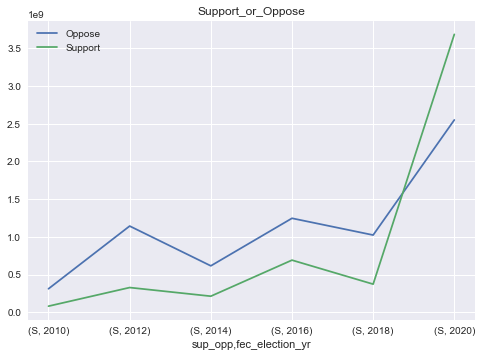

In [15]:
ax = S_O_df[:6].plot.line()
S_O_df[6:].plot.line(ax = ax, title = 'Support_or_Oppose')
ax.legend(['Oppose','Support'])

In [16]:
ts_exp = exp_df.dropna(subset = ['exp_date'])[['exp_amo', 'exp_date']]
ts_exp['exp_date'] = pd.to_datetime(ts_exp.exp_date)
new = ts_exp.groupby(['exp_date']).sum()
state_exp = exp_df.dropna(subset=['can_office_state'])[['can_office_state','cand_pty_aff','exp_amo']].groupby(['can_office_state','cand_pty_aff']).sum()
state_exp = state_exp[(state_exp.index.get_level_values(1) == 'DEMOCRATIC PARTY') | (state_exp.index.get_level_values(1) == 'REPUBLICAN PARTY')]
state_exp = state_exp[3:]
state_exp

exp_amo
can_office_state cand_pty_aff                 
AK               DEMOCRATIC PARTY  37175613.88
                 REPUBLICAN PARTY  18488732.53
AL               DEMOCRATIC PARTY  21696243.53
                 REPUBLICAN PARTY  15301920.12
AR               DEMOCRATIC PARTY  26711720.75
...                                        ...
WV               DEMOCRATIC PARTY  34378046.28
                 REPUBLICAN PARTY  31158232.03
WY               DEMOCRATIC PARTY    319324.93
                 REPUBLICAN PARTY   1029044.61
ZZ               REPUBLICAN PARTY   3153895.16

[113 rows x 1 columns]

/Users/riteshsuhag/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


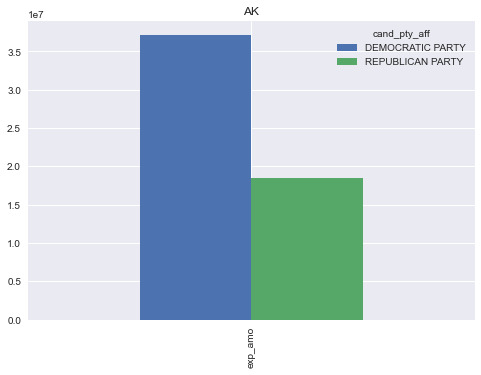

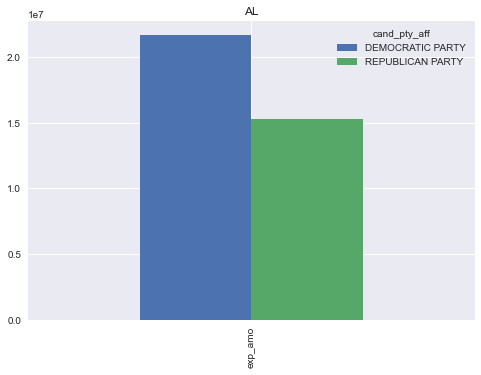

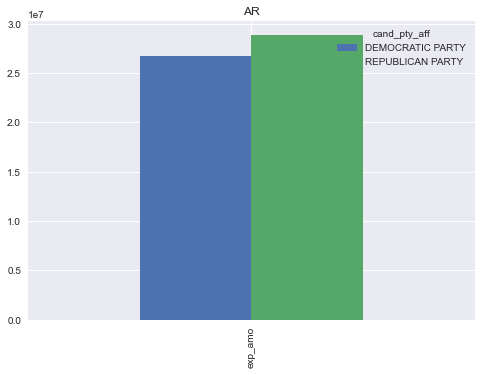

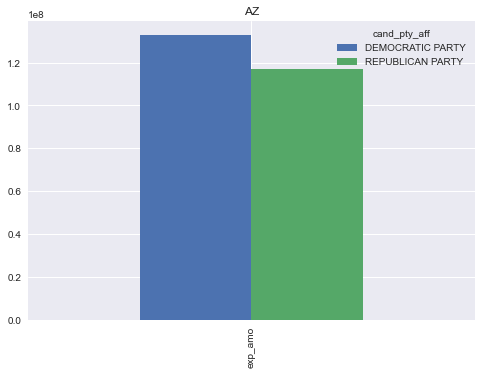

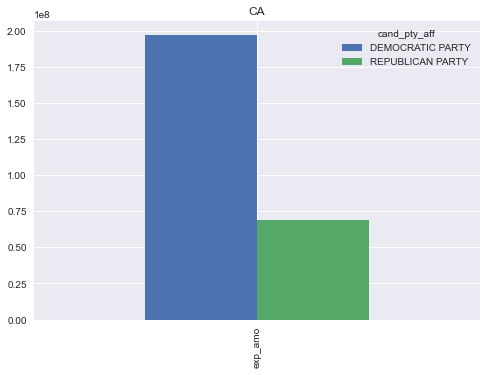

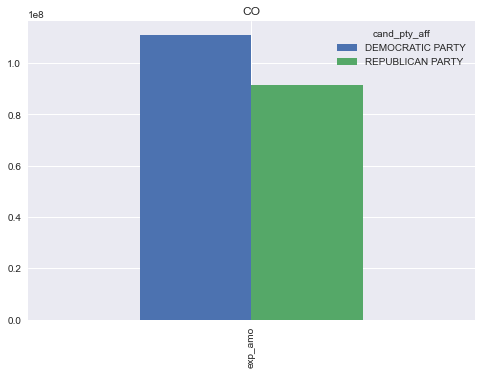

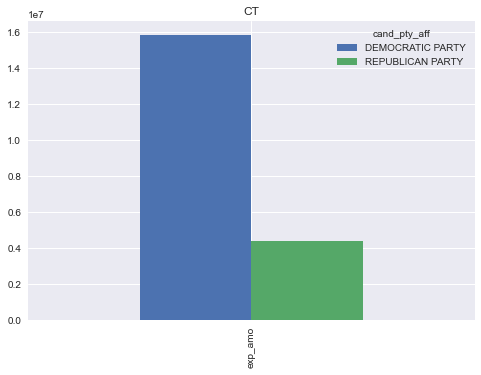

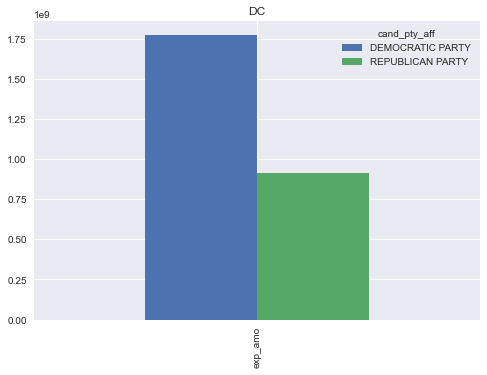

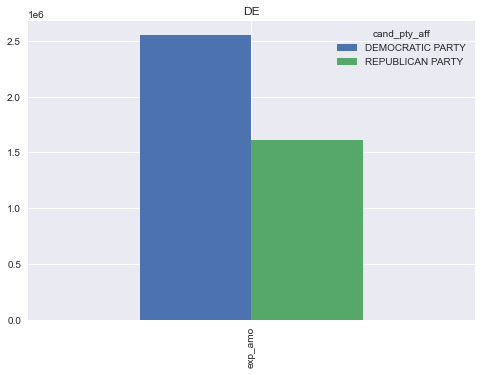

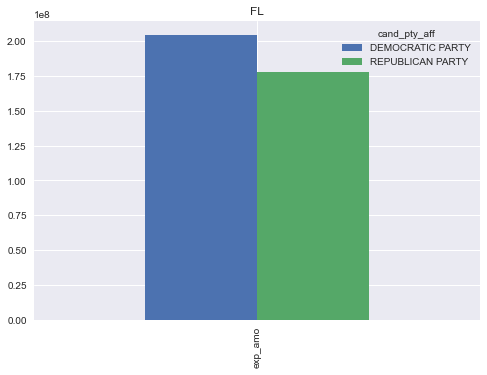

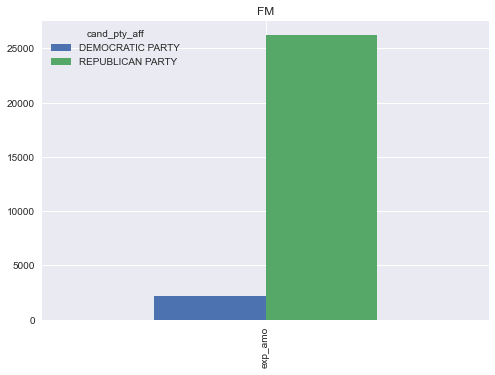

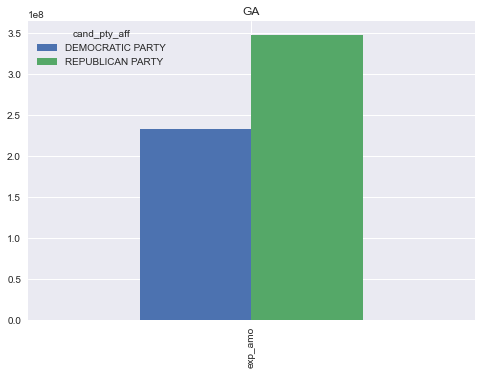

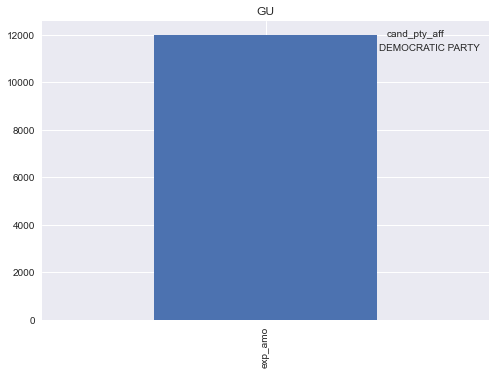

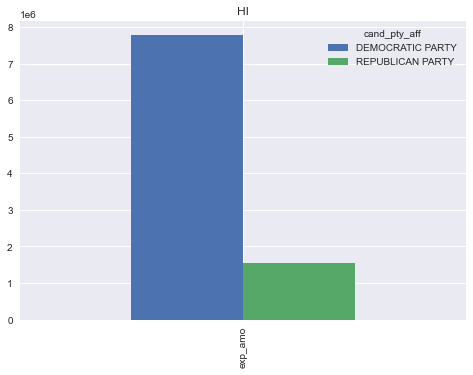

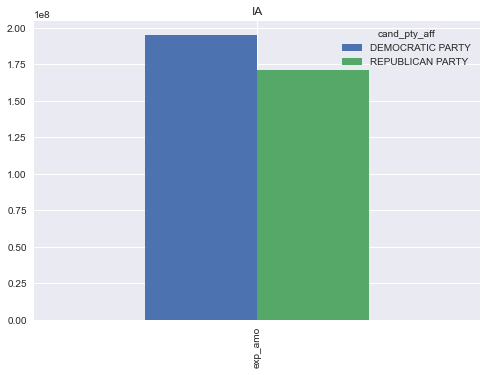

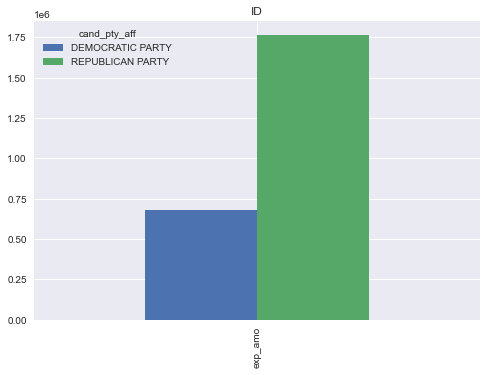

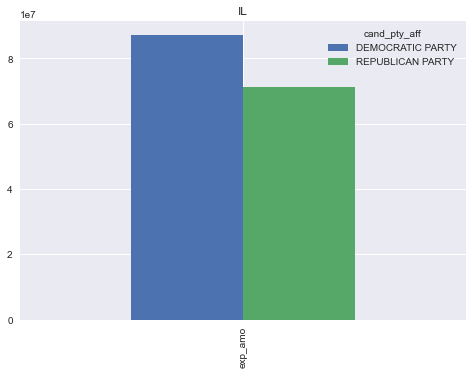

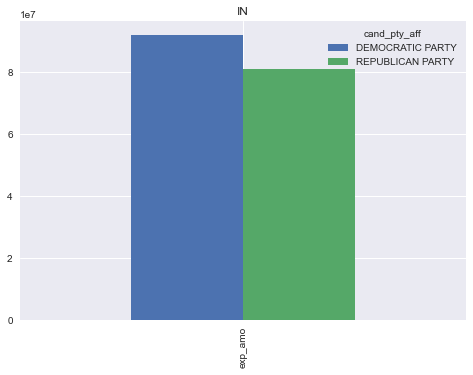

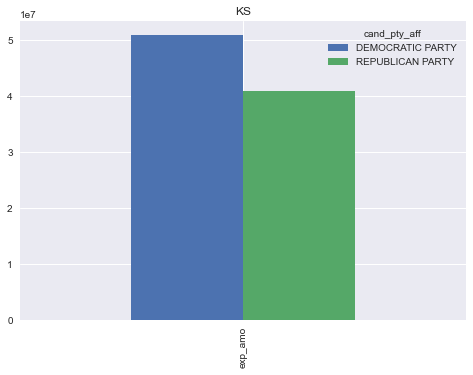

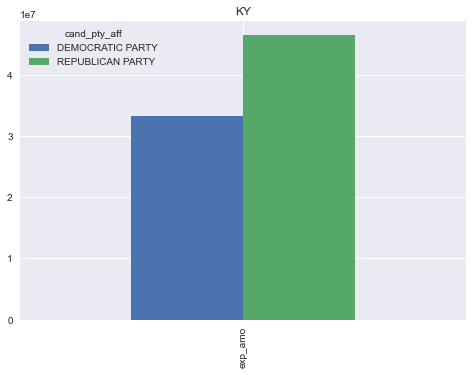

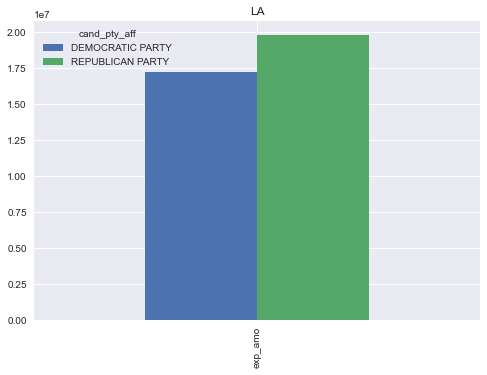

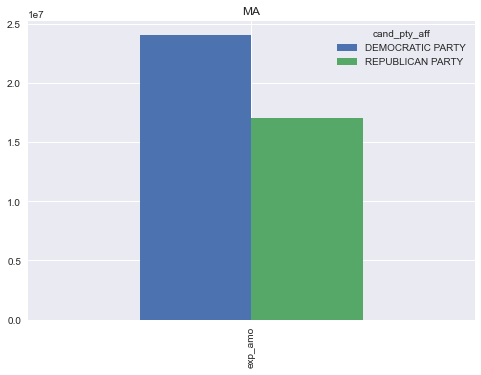

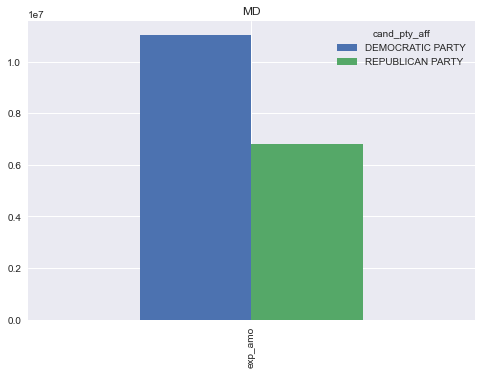

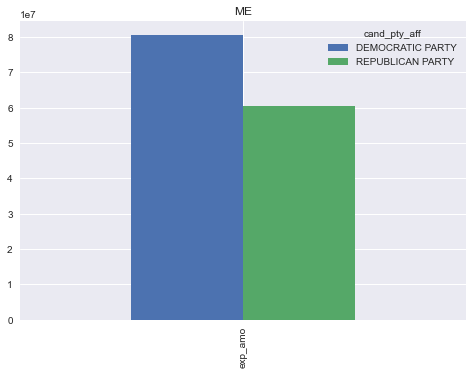

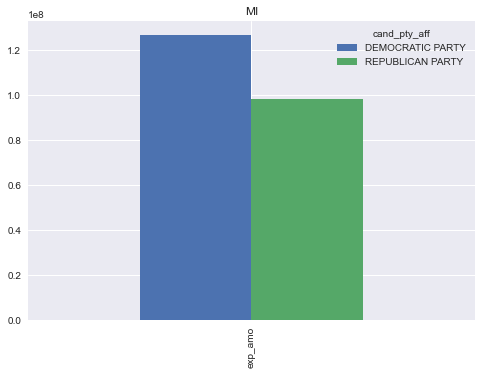

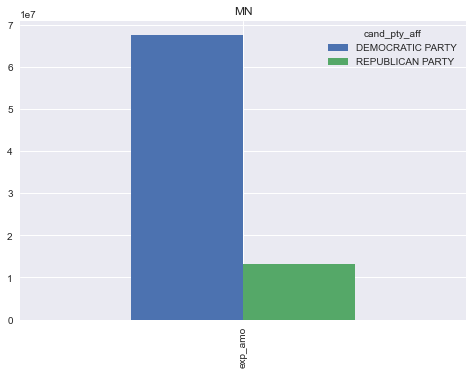

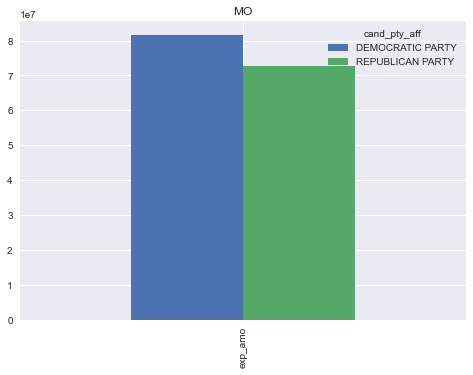

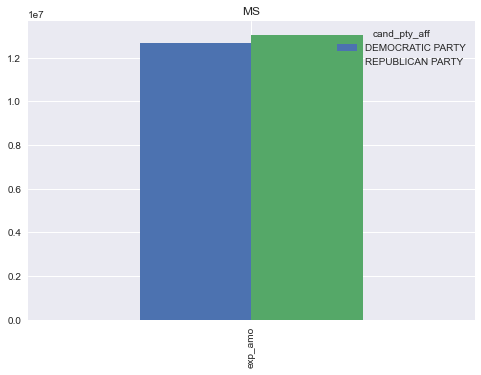

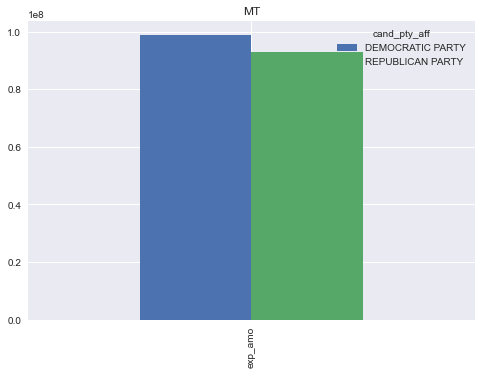

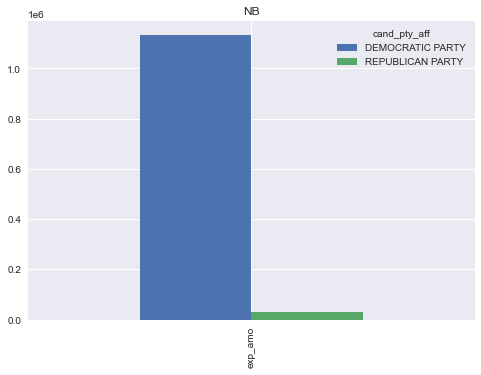

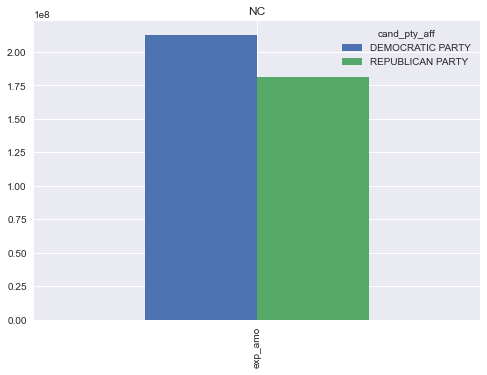

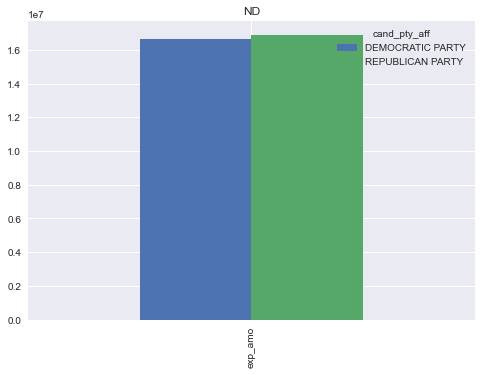

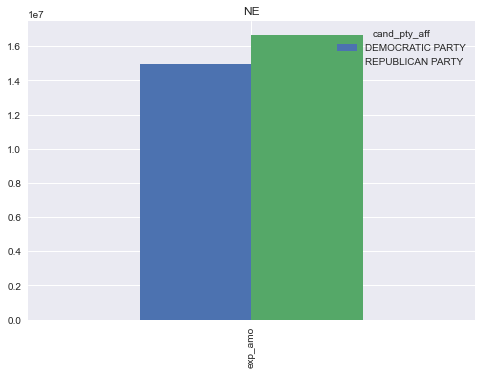

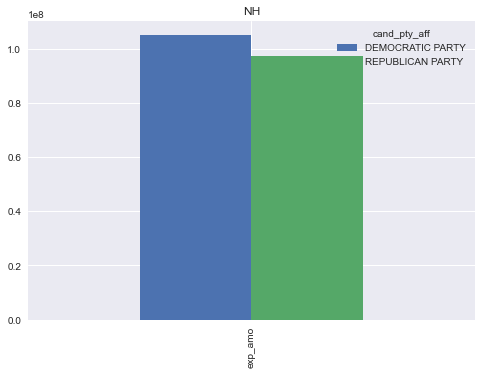

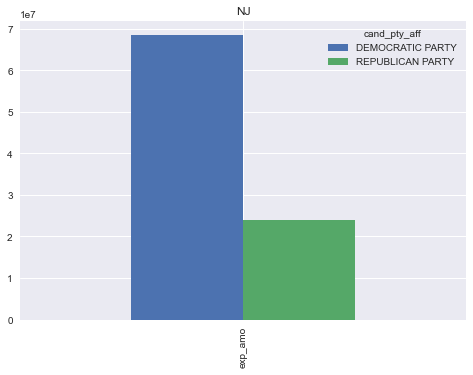

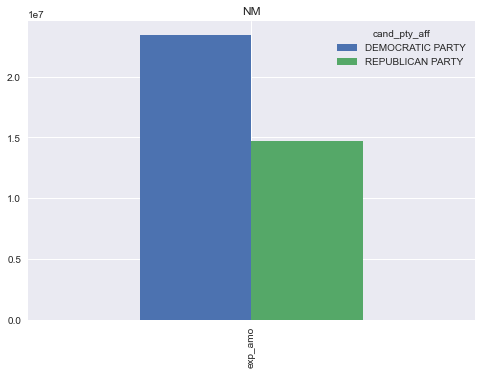

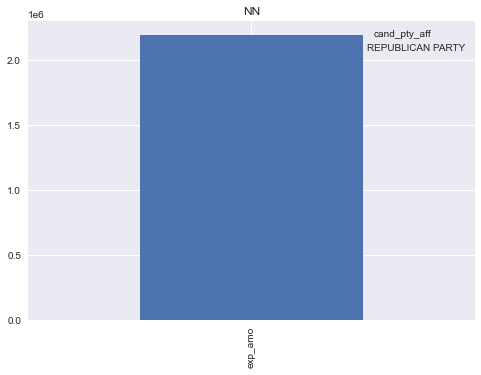

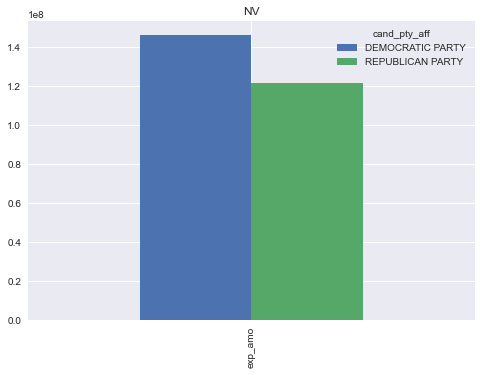

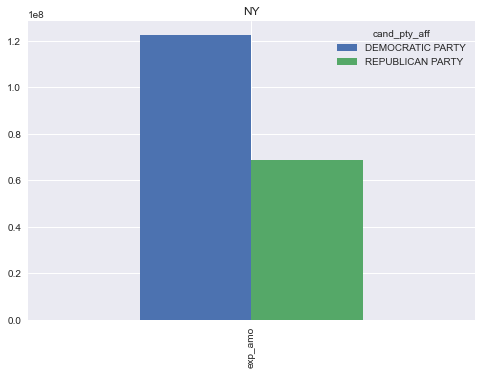

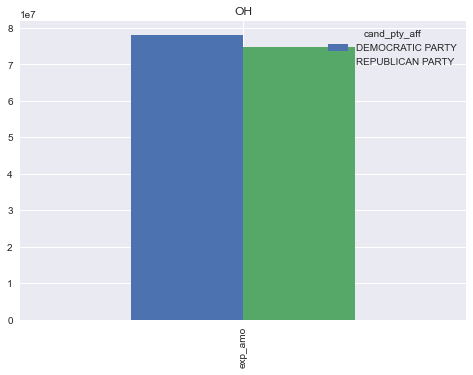

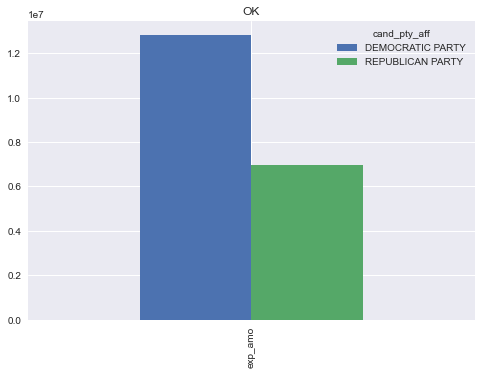

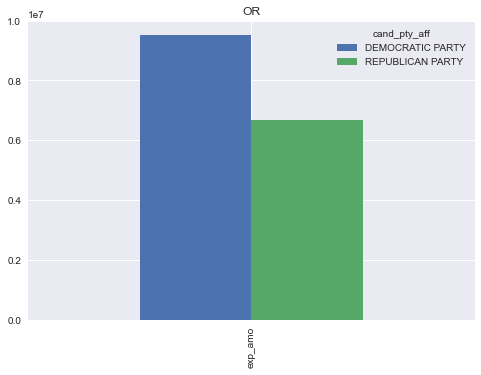

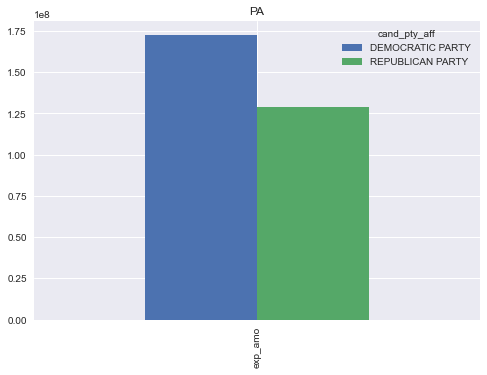

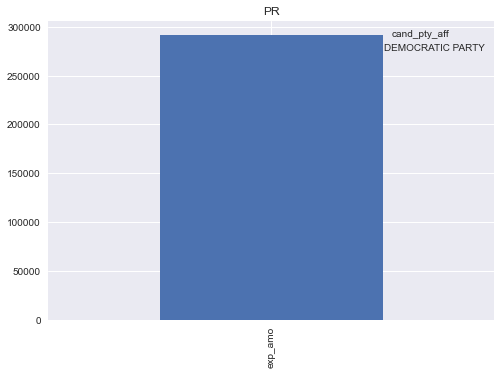

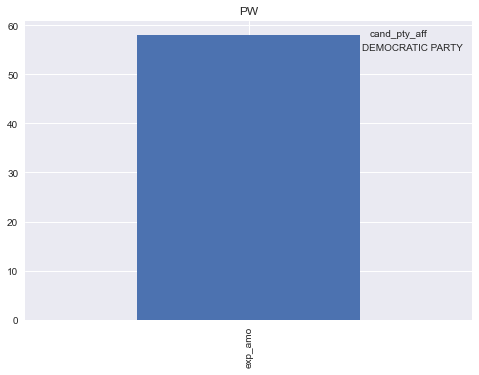

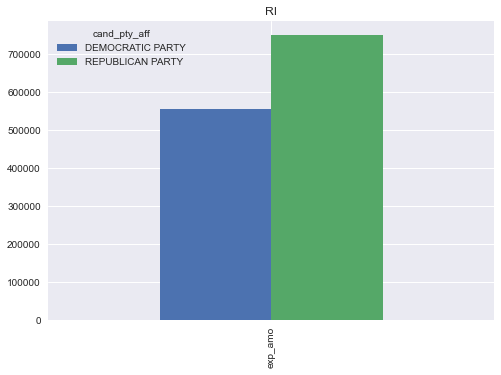

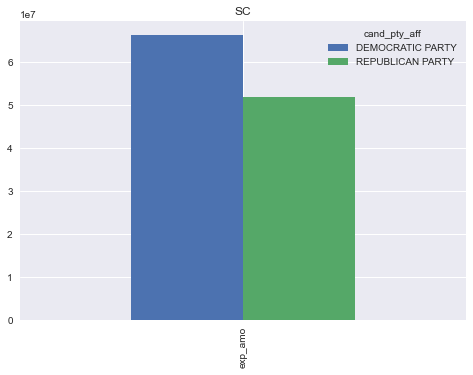

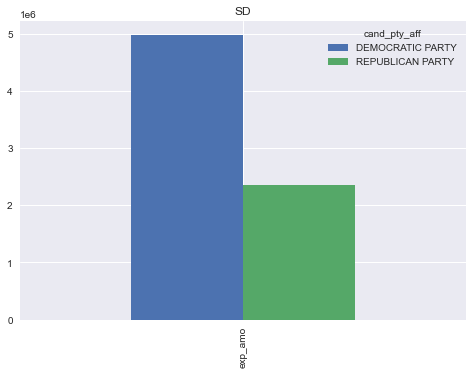

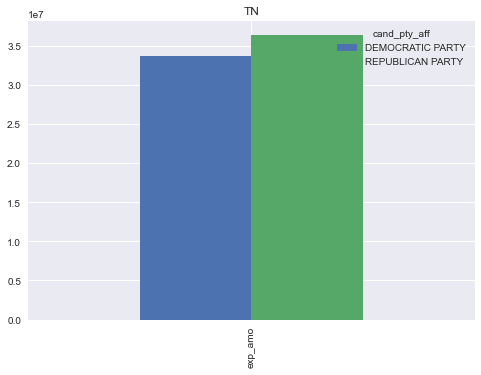

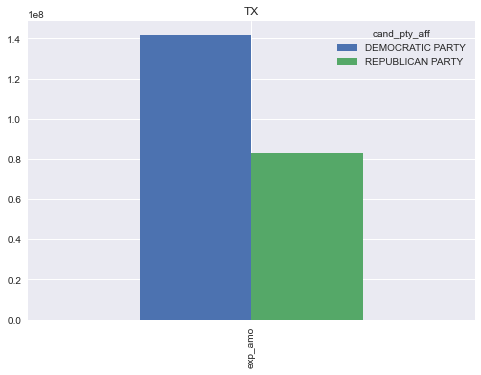

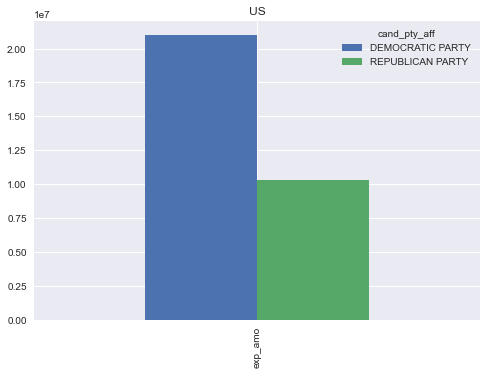

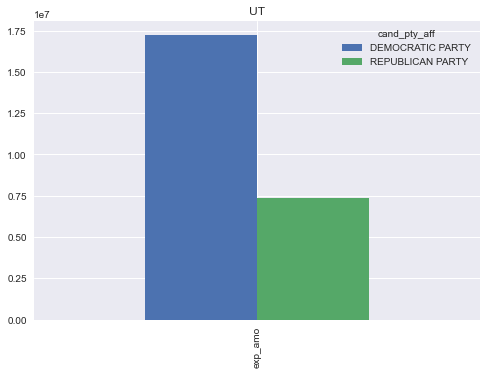

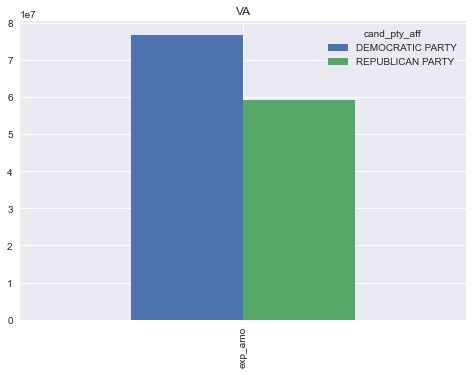

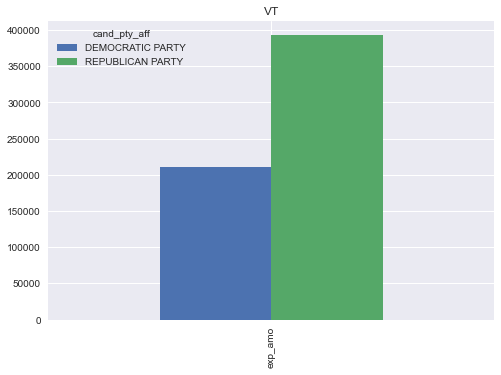

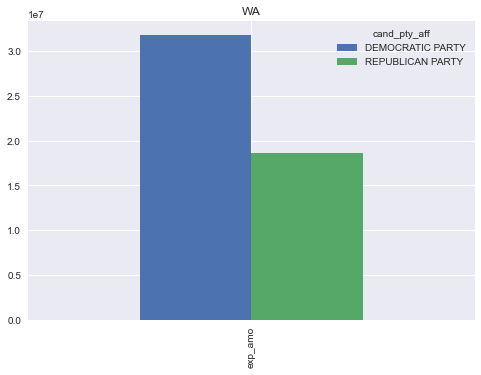

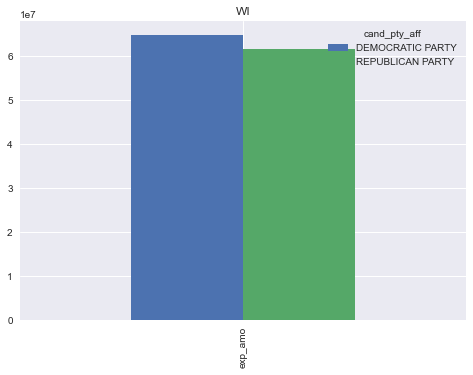

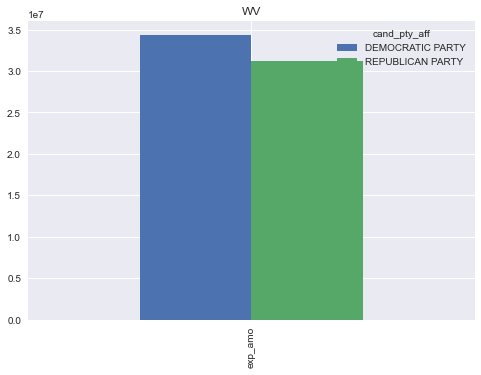

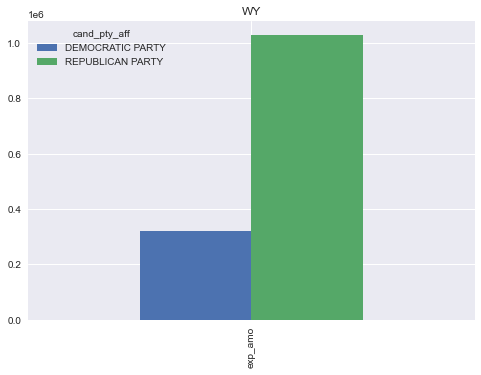

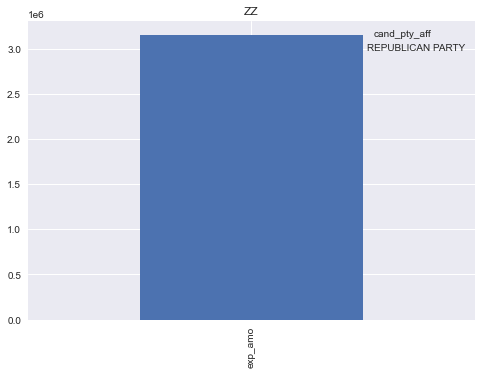

In [17]:
new = state_exp.transpose()
states = state_exp.index.get_level_values(0).unique()
for state in states:
    new[state].plot.bar(title = state)
plt.show()

In [18]:
year_wise_state_exp = exp_df.dropna(subset=['can_office_state','cand_pty_aff'])[['can_office_state','cand_pty_aff','exp_amo','fec_election_yr']].groupby(
    ['can_office_state','cand_pty_aff','fec_election_yr']).sum()
year_wise_state_exp = year_wise_state_exp[
    (year_wise_state_exp.index.get_level_values(1) == 'DEMOCRATIC PARTY') | 
    (year_wise_state_exp.index.get_level_values(1) == 'REPUBLICAN PARTY')]
year_wise_state_exp = year_wise_state_exp[6:]
df = pd.read_csv('raw_data/merged.csv')
abb_ix = [us_state_abbrev[k] for k in df.state.values]
df['state'] = abb_ix
df2 = df[['year','state','votes_dem', 'votes_gop','total_votes']].groupby(['state','year']).sum()
df2.sort_values(by = ['state','year'], inplace = True)
states = df2.index.get_level_values(0).unique()
df2['votes_dem_perc'] = 100*df2['votes_dem']/df2['total_votes']
df2['votes_gop_perc'] = 100*df2['votes_gop']/df2['total_votes']
df2 = df2.drop(['votes_dem', 'votes_gop'], axis =1)
df2 = df2.drop(['total_votes'], axis =1)
if year_wise_state_exp.loc['AK'].loc['DEMOCRATIC PARTY'].index[0]%4 != 0:
    a = year_wise_state_exp.loc['AK'].loc['DEMOCRATIC PARTY'].values[0]+ year_wise_state_exp.loc['AK'].loc['DEMOCRATIC PARTY'].values[1]
dem_exp = {}
rep_exp = {}
states = year_wise_state_exp.index.get_level_values(0).unique()
states = np.delete(states, [10,12,29,36,43,44,50,58])
for state in states:
    if state in abb_ix:
        st = year_wise_state_exp.loc[state]
        st_dem = st.loc['DEMOCRATIC PARTY']
        st_rep = st.loc['REPUBLICAN PARTY']
        l_dem = st_dem.shape[0]
        l_rep = st_rep.shape[0]
        rep_exp[state] = {}
        dem_exp[state] = {}
        for i in range(l_dem):            
            if st_dem.index[i]%4 != 0: 
                if i+1<l_dem-1:
                    dem_exp[state][st_dem.index[i] + 2] = (st_dem.values[i] + st_dem.values[i+1])[0]
                else:
                    dem_exp[state][st_dem.index[i]+2] = st_dem.values[i][0] 
        for i in range(l_rep):
            if st_rep.index[i]%4 != 0:
                if i+1<l_dem-1:
                    rep_exp[state][st_rep.index[i] + 2] = (st_rep.values[i] + st_rep.values[i+1])[0]
                else:
                    rep_exp[state][st_rep.index[i]+2] = st_rep.values[i][0]
        
iterables = [states, [2012, 2016, 2020]]
indx = pd.MultiIndex.from_product(iterables, names=["state", "year"])
abc = pd.DataFrame(columns = ['dem_exp', 'rep_exp'],index = indx)
for state in states:
    for key in dem_exp[state]:
        abc.loc[state].loc[key]['dem_exp'] = dem_exp[state][key]
    for key in rep_exp[state]:
        abc.loc[state].loc[key]['rep_exp'] = rep_exp[state][key]
abc = abc.fillna(0)/1000000
abc['votes_dem_perc'] = df2[df2.index.get_level_values(1)>2008]['votes_dem_perc']
abc['votes_gop_perc'] = df2[df2.index.get_level_values(1)>2008]['votes_gop_perc']
abc

dem_exp    rep_exp  votes_dem_perc  votes_gop_perc
state year                                                      
AK    2012  20.535756   2.600446       40.812659       54.801577
      2016  20.392580  15.725669       36.041373       50.566677
      2020   0.003387   0.000008       39.199327       48.522791
AL    2012   3.957966   3.119558       38.432866       60.662360
      2016   0.609440   1.225656       34.358027       62.083003
...               ...        ...             ...             ...
WV    2016   6.387024   6.599431       26.476928       68.630575
      2020  21.376201  16.185431       29.696521       68.631552
WY    2012   0.000000   0.000000       27.818888       68.642622
      2016   0.239063   0.000000       21.877357       68.172633
      2020   0.078015   0.000000       26.553574       69.936227

[153 rows x 4 columns]

In [19]:
for key in dem_exp['AK']:
    abc.loc['AK'].loc[key]['dem_exp'] = dem_exp['AK'][key]
    abc.loc['AK'].loc[key]['rep_exp'] = rep_exp['AK'][key]
abc

dem_exp    rep_exp  votes_dem_perc  votes_gop_perc
state year                                                      
AK    2012  20.535756   2.600446       40.812659       54.801577
      2016  20.392580  15.725669       36.041373       50.566677
      2020   0.003387   0.000008       39.199327       48.522791
AL    2012   3.957966   3.119558       38.432866       60.662360
      2016   0.609440   1.225656       34.358027       62.083003
...               ...        ...             ...             ...
WV    2016   6.387024   6.599431       26.476928       68.630575
      2020  21.376201  16.185431       29.696521       68.631552
WY    2012   0.000000   0.000000       27.818888       68.642622
      2016   0.239063   0.000000       21.877357       68.172633
      2020   0.078015   0.000000       26.553574       69.936227

[153 rows x 4 columns]

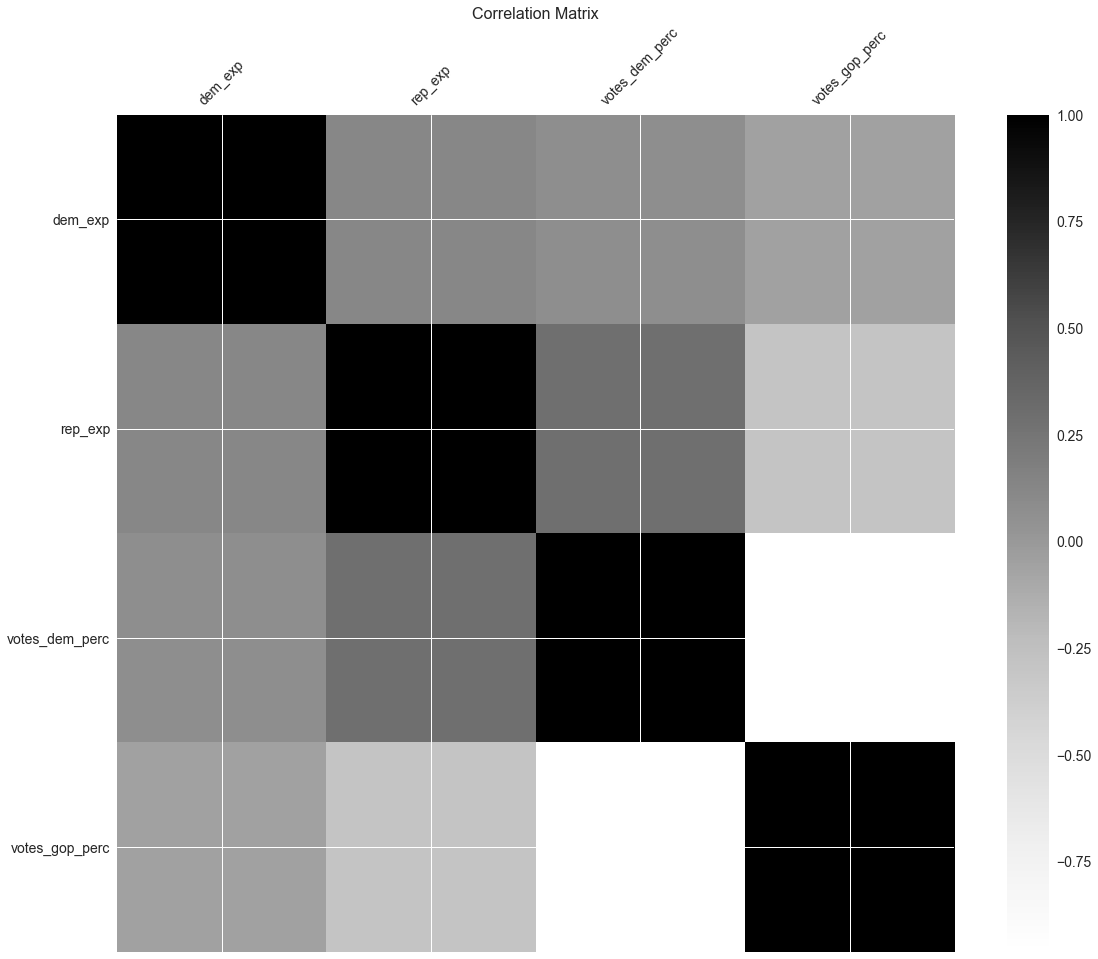

In [20]:
f = plt.figure(figsize=(19, 15))
plt.matshow(abc.corr(), fignum = f.number)
plt.xticks(range(abc.select_dtypes(['number']).shape[1]), abc.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(abc.select_dtypes(['number']).shape[1]), abc.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [21]:
states

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='can_office_state')

<ipython-input-22-ef6f7bfdd35c>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows = 1, ncols = 2)


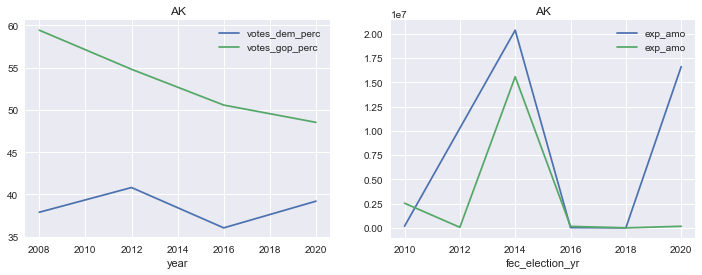

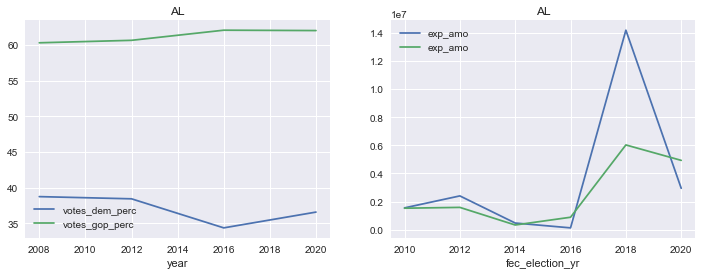

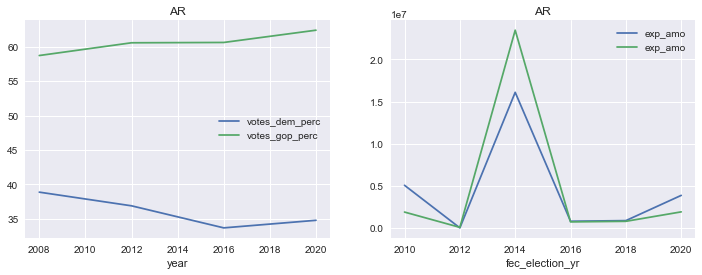

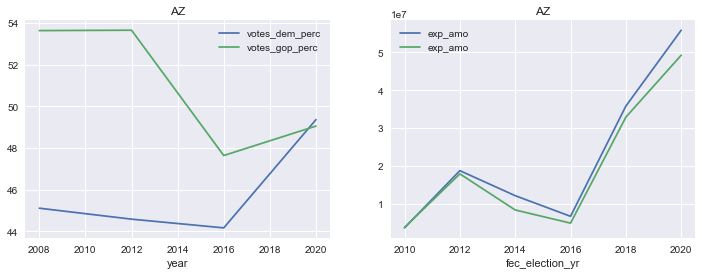

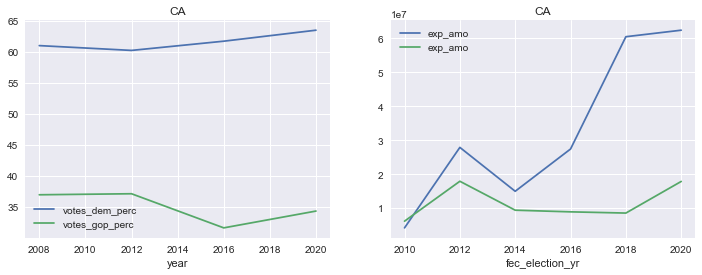

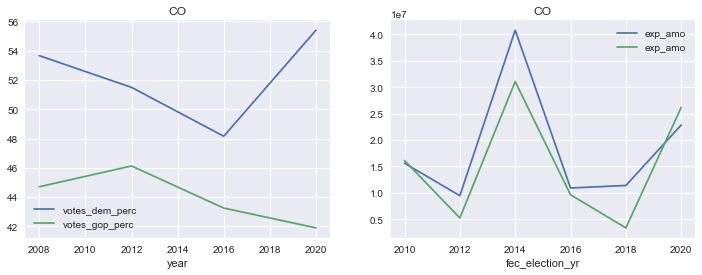

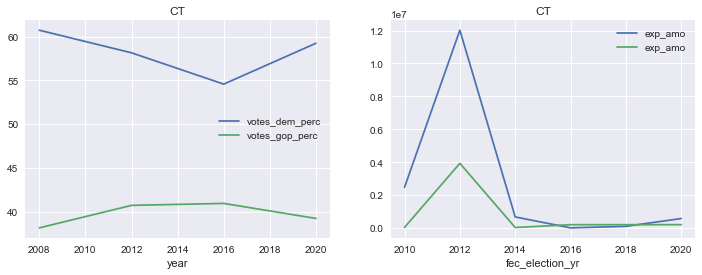

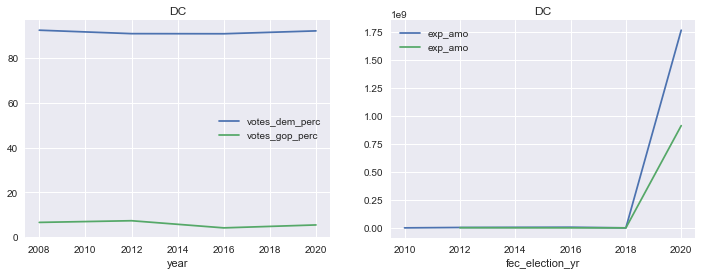

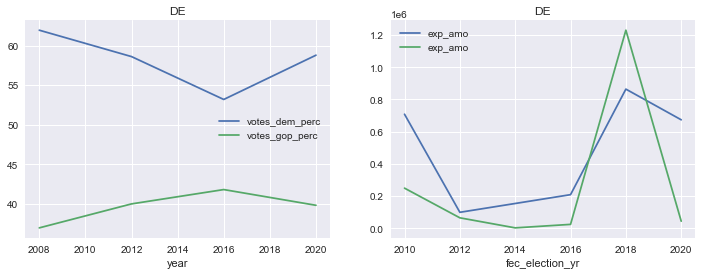

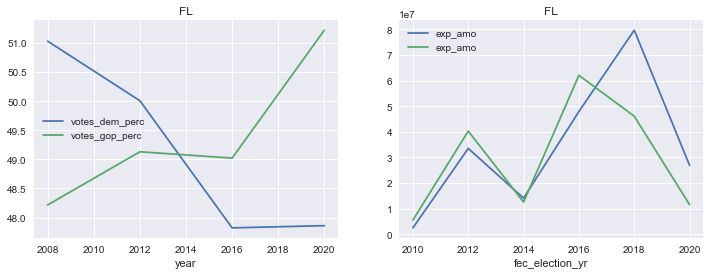

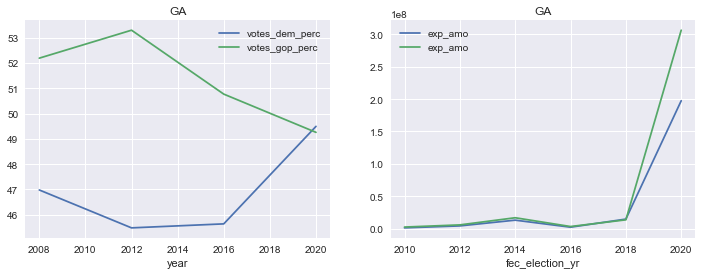

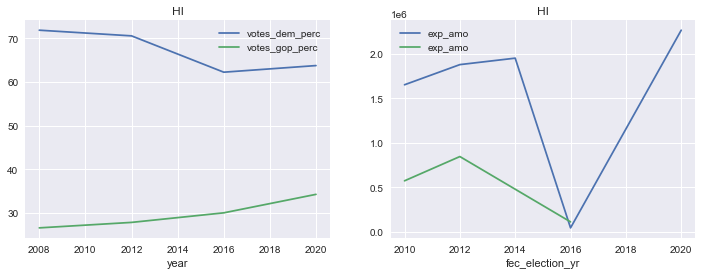

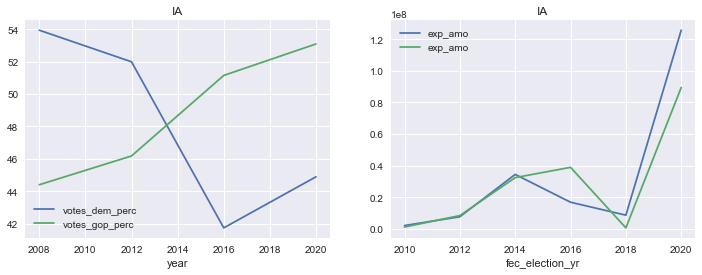

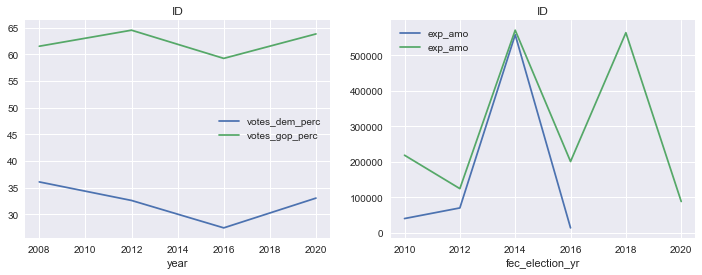

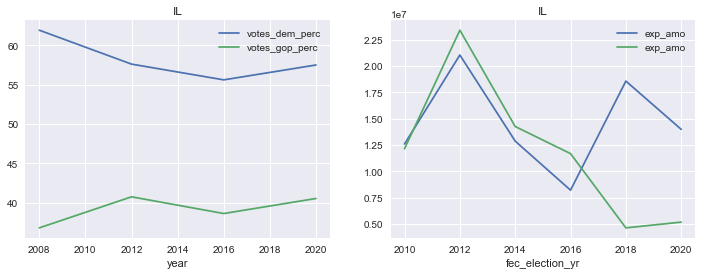

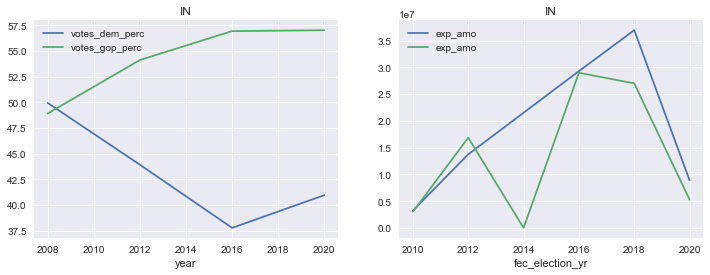

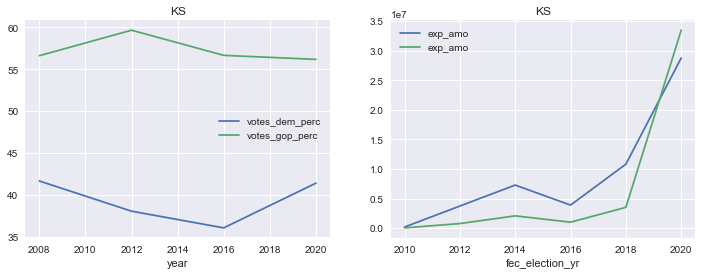

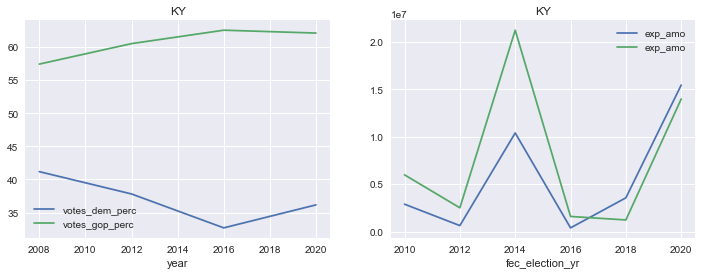

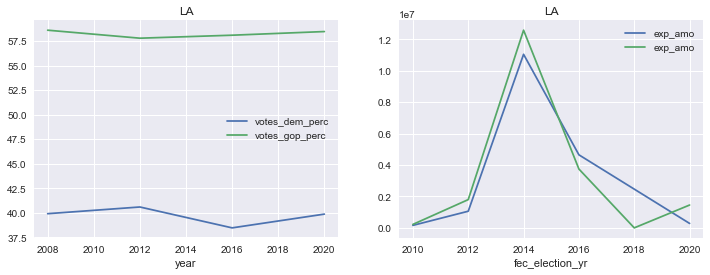

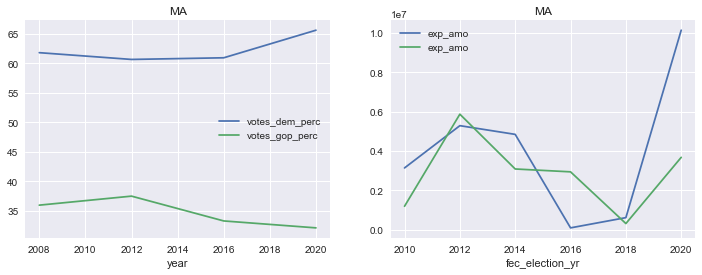

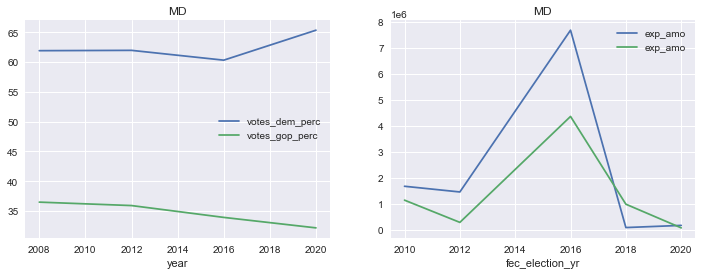

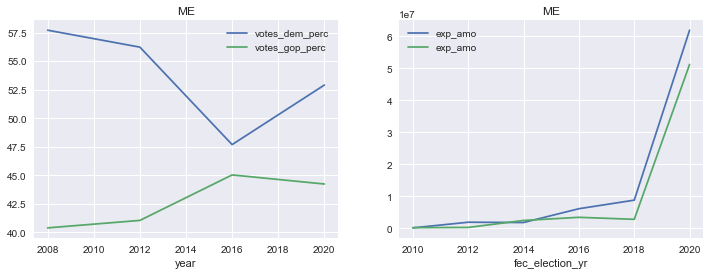

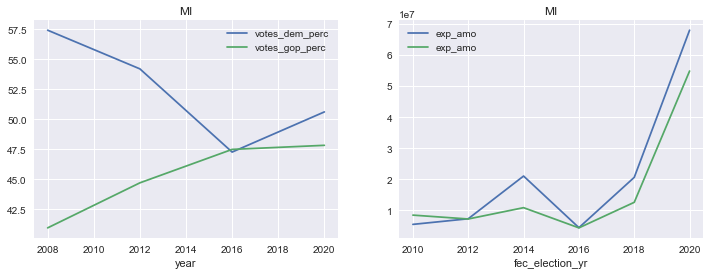

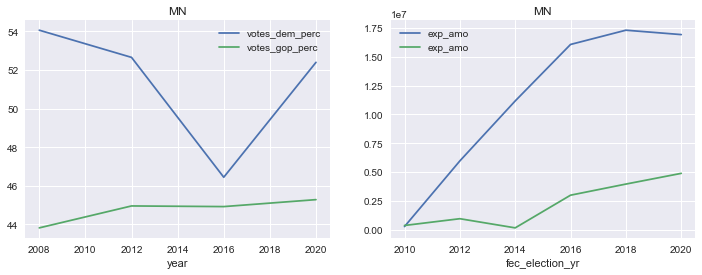

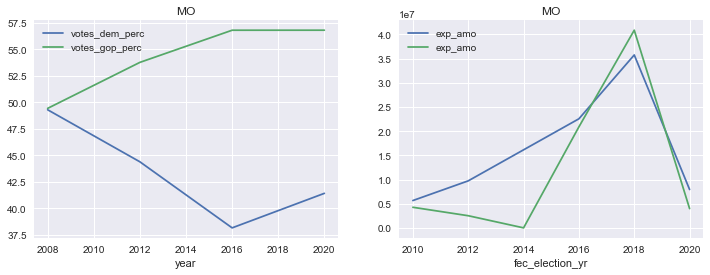

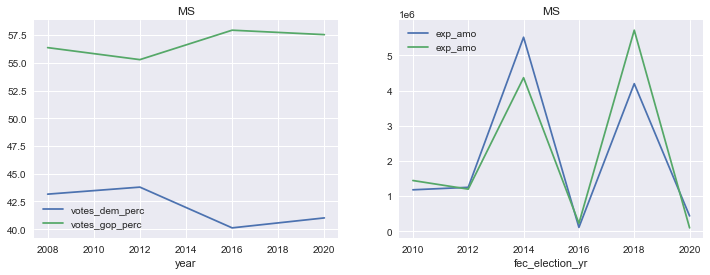

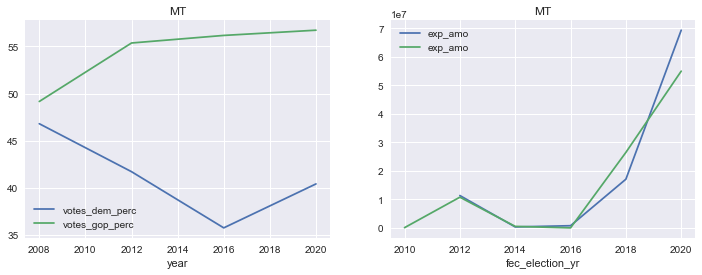

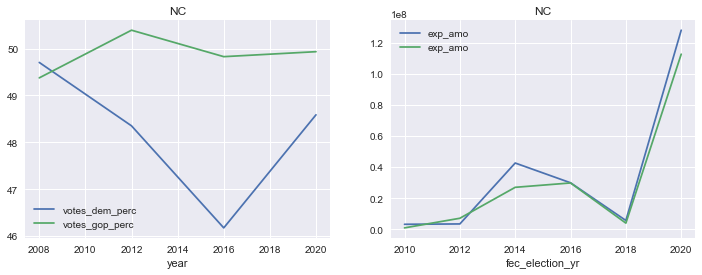

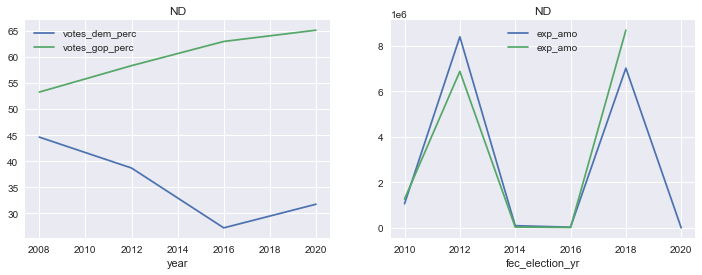

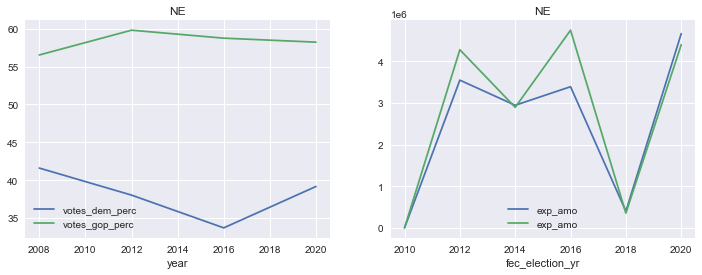

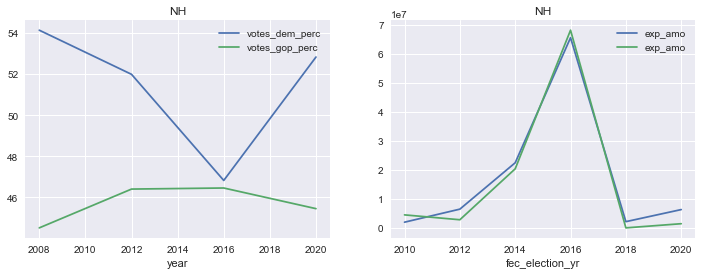

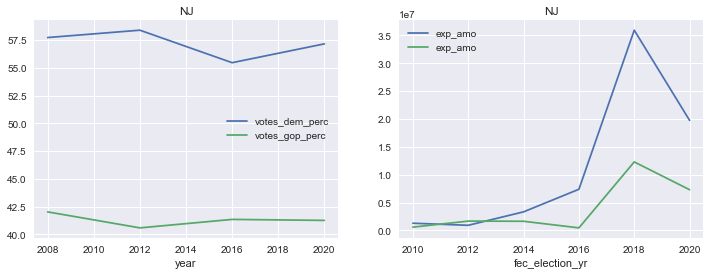

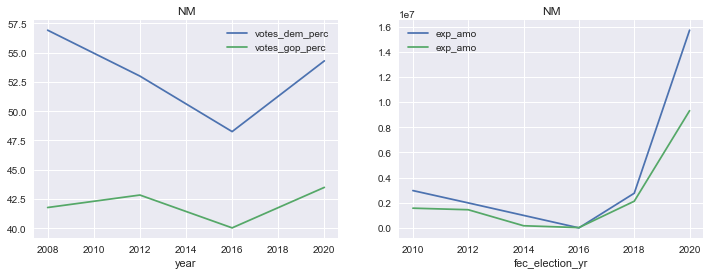

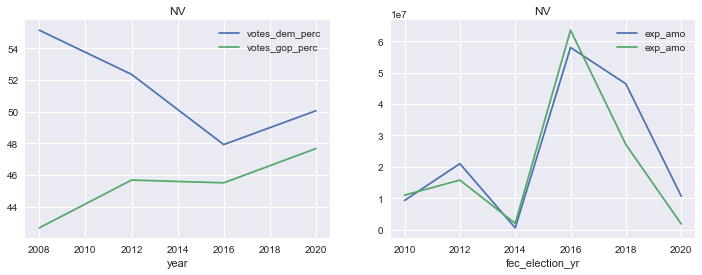

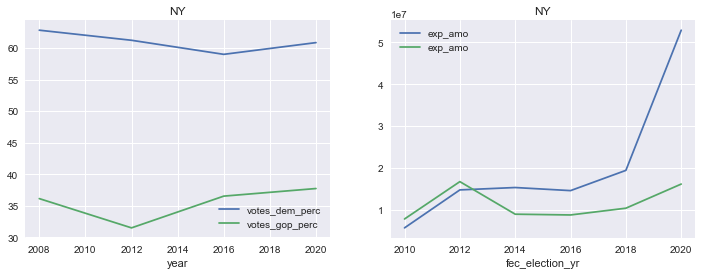

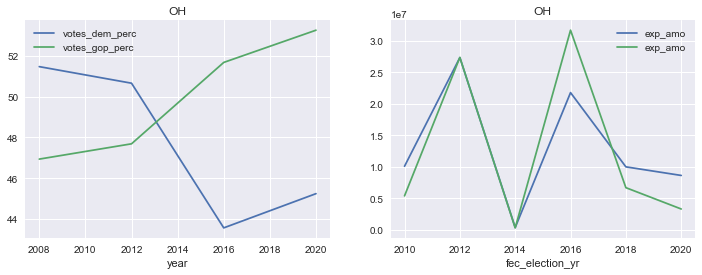

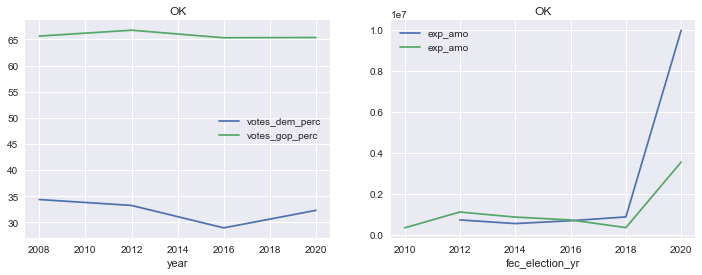

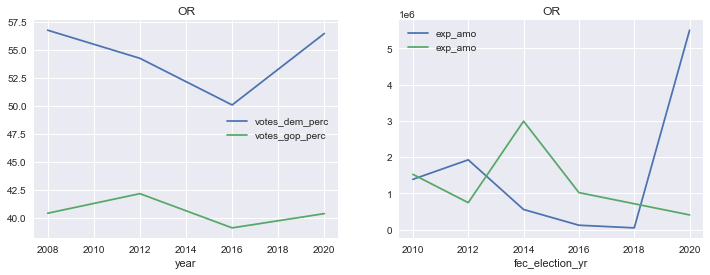

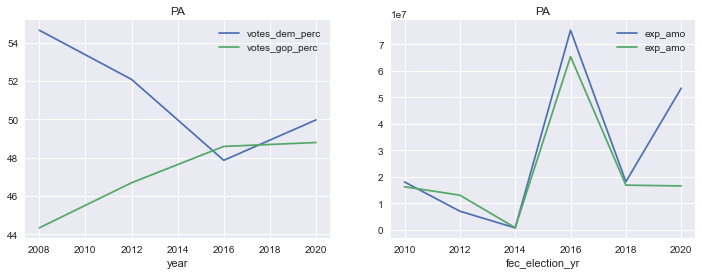

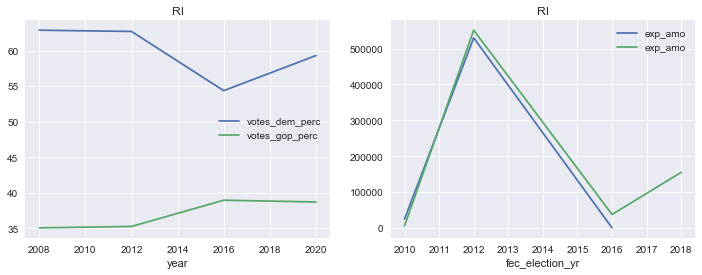

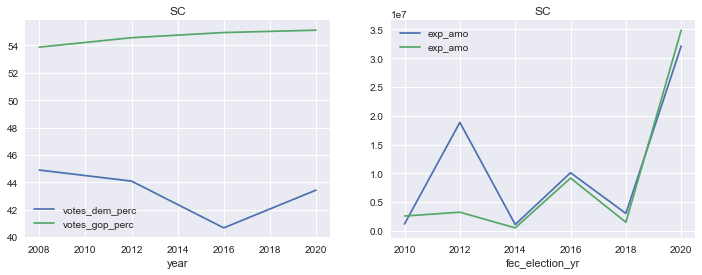

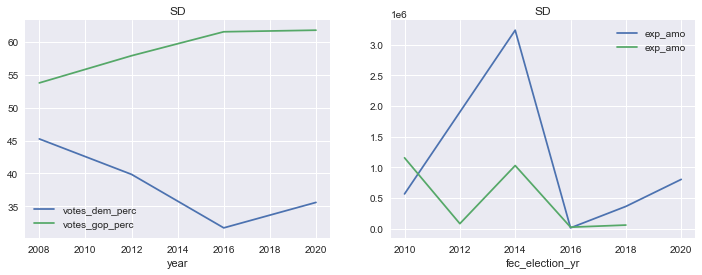

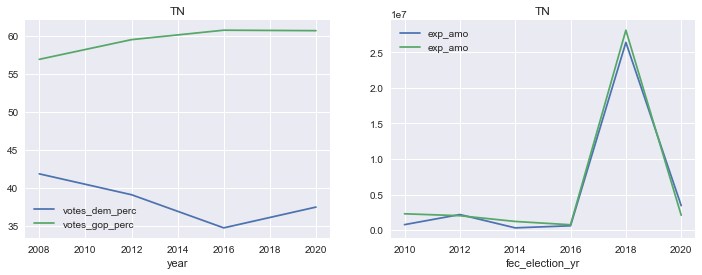

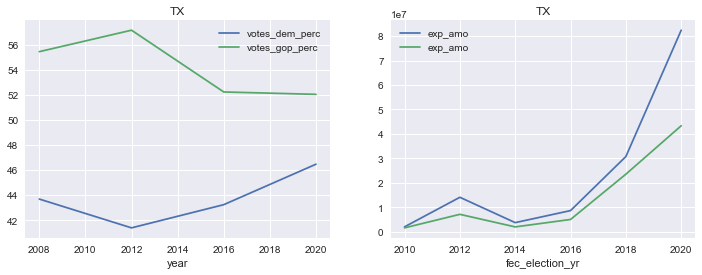

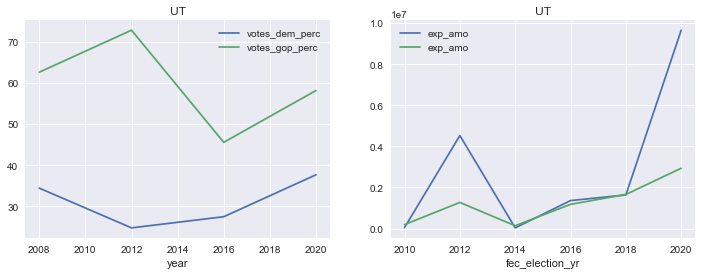

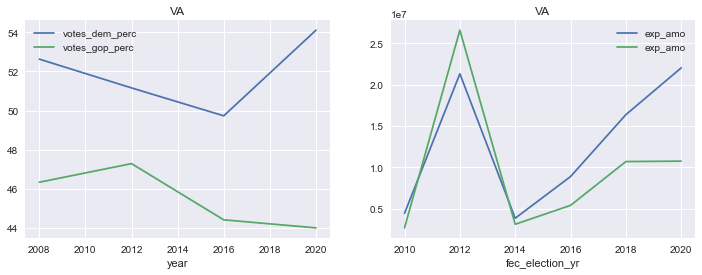

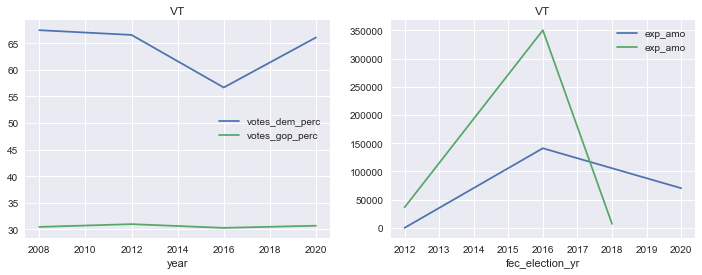

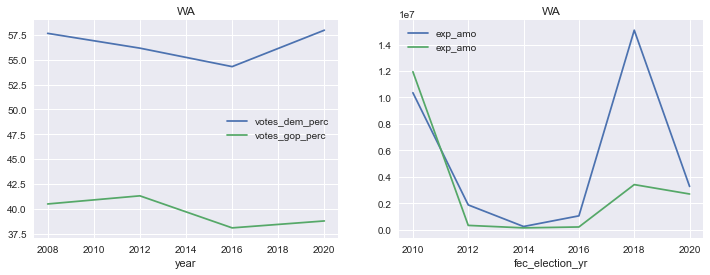

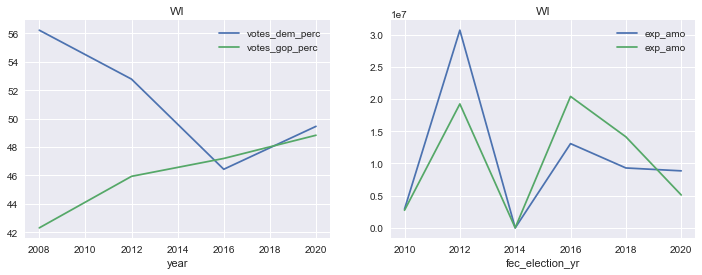

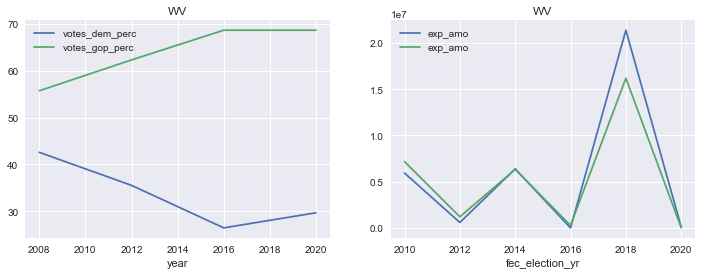

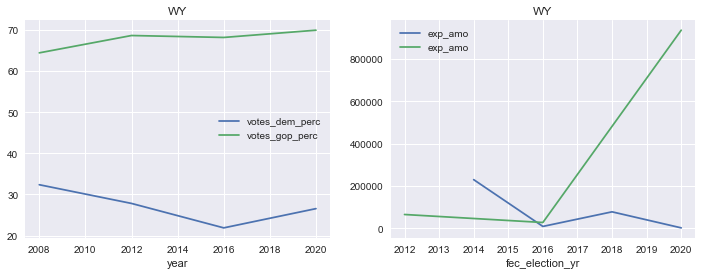

In [22]:
ywse_t = year_wise_state_exp.transpose()
for state in states:
    fig, axes = plt.subplots(nrows = 1, ncols = 2)
    df2.loc[state][df2.loc[state].index>2007].plot.line(ax = axes[0],title = state, figsize = (12,4))
    ywse_td = ywse_t[state]['DEMOCRATIC PARTY'].transpose()
    ywse_tr = ywse_t[state]['REPUBLICAN PARTY'].transpose()
    ywse_td.plot.line(ax = axes[1],title = state, figsize = (12,4))
    ywse_tr.plot.line(ax = axes[1])

In [23]:
# Joining the Purpose Category colums with the original data - 
total_ind_exp.head()

can_office_state cand_pty_aff    exp_amo   exp_date    agg_amo sup_opp  \
0               NY          NaN   98844.72  14-OCT-10   98844.72       S   
1               MA          NaN   74250.00  12-JAN-10   74250.00       S   
2               MA          NaN    7898.40  08-SEP-10  207898.40       S   
3               MA          NaN   32000.00  08-SEP-10  239898.40       S   
4               MA          NaN  150000.00  08-SEP-10  200000.00       S   

                     pur  fec_election_yr party  
0                MAILERS             2010        
1             ROBO CALLS             2010        
2  LIVE PHONE BANK CALLS             2010        
3  LIVE PHONE BANK CALLS             2010        
4              RADIO ADS             2010

In [24]:
total_ind_exp['pur_temp'] = total_ind_exp['pur'].str.lower()
final_df = total_ind_exp.merge(purpose_df,how='left',left_on=['pur_temp'],right_on=['pur'])
# Renaming the column -
final_df = final_df.rename(columns = {'pur_x':'pur','can_office_state':'state', 'fec_election_yr':'year'})

# Dropping unnecessary columns - 
final_df.drop(['exp_date', 'agg_amo', 'pur_temp', 'pur_y', 'cleaned_pur'], axis = 1, inplace = True)

final_df.head()

state cand_pty_aff    exp_amo sup_opp                    pur  year party  \
0    NY          NaN   98844.72       S                MAILERS  2010         
1    MA          NaN   74250.00       S             ROBO CALLS  2010         
2    MA          NaN    7898.40       S  LIVE PHONE BANK CALLS  2010         
3    MA          NaN   32000.00       S  LIVE PHONE BANK CALLS  2010         
4    MA          NaN  150000.00       S              RADIO ADS  2010         

         category  
0  Communications  
1  Communications  
2  Communications  
3  Communications  
4   Advertisement

In [25]:
temp_df = final_df.dropna(subset = ['cand_pty_aff'])
temp_df.loc[(temp_df['sup_opp']=='O') & (temp_df['cand_pty_aff']=='REPUBLICAN PARTY'),'cand_pty_aff'] = 'DEMOCRATIC PARTY1'
temp_df.loc[(temp_df['sup_opp']=='O') & (temp_df['cand_pty_aff']=='DEMOCRATIC PARTY'),'cand_pty_aff'] = 'REPUBLICAN PARTY'
temp_df.loc[temp_df['cand_pty_aff']=='DEMOCRATIC PARTY1', 'cand_pty_aff'] = 'DEMOCRATIC PARTY'
temp_df

/Users/riteshsuhag/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


state      cand_pty_aff   exp_amo sup_opp  \
29        KY  DEMOCRATIC PARTY   5753.78       O   
30        KY  DEMOCRATIC PARTY  65000.00       O   
31        KY  DEMOCRATIC PARTY  15000.00       O   
32        AR  DEMOCRATIC PARTY   5600.00       S   
33        NY  DEMOCRATIC PARTY   8000.00       O   
...      ...               ...       ...     ...   
525684    GA  DEMOCRATIC PARTY   1240.90       S   
525685    GA  DEMOCRATIC PARTY   1286.26       S   
525686    GA  DEMOCRATIC PARTY   1920.24       S   
525687    GA  DEMOCRATIC PARTY   6157.98       S   
525688    GA  DEMOCRATIC PARTY  14782.50       S   

                                                      pur  year        party  \
29                                          Ad Production  2010  Republicans   
30                                         TV Advertising  2010  Republicans   
31                                         TV Advertising  2010  Republicans   
32                                            Advertising  2010    Democrats   
33                                            Advertising  2010  Republicans   
...                                                   ...   ...          ...   
525684                              Shipping of postcards  2020    Democrats   
525685                      Canvassing Services (In-kind)  2020    Democrats   
525686                      Canvassing Services (In-kind)  2020    Democrats   
525687                      Canvassing Services (In-kind)  2020    Democrats   
525688  Estimated Costs for Canvassing Expenses (in-kind)  2020    Democrats   

              category  
29       Advertisement  
30       Advertisement  
31       Advertisement  
32       Advertisement  
33       Advertisement  
...                ...  
525684  Communications  
525685       Logistics  
525686       Logistics  
525687       Logistics  
525688       Logistics  

[474046 rows x 8 columns]

In [26]:
temp_df['dem_comm_exp'] = np.where(temp_df['category']!='Communications',
                                   0,np.where(temp_df['cand_pty_aff'] == 'DEMOCRATIC PARTY', temp_df['exp_amo']/1000000,0))
temp_df['rep_comm_exp'] = np.where(temp_df['category']!='Communications',
                                   0,np.where(temp_df['cand_pty_aff'] == 'REPUBLICAN PARTY', temp_df['exp_amo']/1000000,0))
temp_df['dem_adv_exp'] = np.where(temp_df['category']!='Advertisement',
                                   0,np.where(temp_df['cand_pty_aff'] == 'DEMOCRATIC PARTY', temp_df['exp_amo']/1000000,0))
temp_df['rep_adv_exp'] = np.where(temp_df['category']!='Advertisement',
                                   0,np.where(temp_df['cand_pty_aff'] == 'REPUBLICAN PARTY', temp_df['exp_amo']/1000000,0))
temp_df['dem_research_exp'] = np.where(temp_df['category']!='Canvas/Research',
                                   0,np.where(temp_df['cand_pty_aff'] == 'DEMOCRATIC PARTY', temp_df['exp_amo']/1000000,0))
temp_df['rep_research_exp'] = np.where(temp_df['category']!='Canvas/Research',
                                   0,np.where(temp_df['cand_pty_aff'] == 'REPUBLICAN PARTY', temp_df['exp_amo']/1000000,0))
temp_df['dem_others_exp'] = np.where(temp_df['category']!='Others',
                                   0,np.where(temp_df['cand_pty_aff'] == 'DEMOCRATIC PARTY', temp_df['exp_amo']/1000000,0))
temp_df['rep_others_exp'] = np.where(temp_df['category']!='Others',
                                   0,np.where(temp_df['cand_pty_aff'] == 'REPUBLICAN PARTY', temp_df['exp_amo']/1000000,0))
temp_df['dem_logistics_exp'] = np.where(temp_df['category']!='Logistics',
                                   0,np.where(temp_df['cand_pty_aff'] == 'DEMOCRATIC PARTY', temp_df['exp_amo']/1000000,0))
temp_df['rep_logistic_exp'] = np.where(temp_df['category']!='Logistics',
                                   0,np.where(temp_df['cand_pty_aff'] == 'REPUBLICAN PARTY', temp_df['exp_amo']/1000000,0))


<ipython-input-26-e8b20a888316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['dem_comm_exp'] = np.where(temp_df['category']!='Communications',
<ipython-input-26-e8b20a888316>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['rep_comm_exp'] = np.where(temp_df['category']!='Communications',
<ipython-input-26-e8b20a888316>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [27]:
t_df = temp_df.groupby(['state','year']).sum().drop(['00','ZZ','FM','NB','US','NN','PW','GU'])
t_df = t_df.reset_index()
t_df = t_df.iloc[1:]
t_df

state  year       exp_amo  dem_comm_exp  rep_comm_exp  dem_adv_exp  \
1      AK  2010  2.713355e+06      0.001250      0.162881     0.168900   
2      AK  2012  5.732443e+04      0.000000      0.024464     0.000000   
3      AK  2014  3.593700e+07      1.189633      0.044148    18.278144   
4      AK  2016  1.812500e+05      0.000961      0.010084     0.026097   
5      AK  2018  1.117589e+04      0.003387      0.000008     0.000000   
..    ...   ...           ...           ...           ...          ...   
296    WY  2012  6.540259e+04      0.000000      0.003470     0.000000   
297    WY  2014  2.300000e+05      0.000000      0.000000     0.230000   
298    WY  2016  3.671674e+04      0.000033      0.008298     0.009030   
299    WY  2018  7.801487e+04      0.001415      0.000000     0.076600   
300    WY  2020  9.382353e+05      0.000000      0.498587     0.000600   

     rep_adv_exp  dem_research_exp  rep_research_exp  dem_others_exp  \
1       2.357908          0.000000          0.001297        0.000083   
2       0.032829          0.000000          0.000000        0.000000   
3      15.296844          0.281613          0.022500        0.560096   
4       0.139103          0.000000          0.000000        0.000000   
5       0.000000          0.000000          0.000000        0.000000   
..           ...               ...               ...             ...   
296     0.061908          0.000000          0.000000        0.000000   
297     0.000000          0.000000          0.000000        0.000000   
298     0.018445          0.000000          0.000000        0.000000   
299     0.000000          0.000000          0.000000        0.000000   
300     0.280952          0.000000          0.000000        0.001647   

     rep_others_exp  dem_logistics_exp  rep_logistic_exp  
1          0.016512           0.000000          0.004524  
2          0.000031           0.000000          0.000000  
3          0.131148           0.056037          0.076837  
4          0.001124           0.000000          0.003880  
5          0.000000           0.000000          0.000000  
..              ...                ...               ...  
296        0.000025           0.000000          0.000000  
297        0.000000           0.000000          0.000000  
298        0.000911           0.000000          0.000000  
299        0.000000           0.000000          0.000000  
300        0.156450           0.000000          0.000000  

[300 rows x 13 columns]

In [28]:
t_df = t_df.groupby(['state',pd.cut(t_df['year'], bins = [2000,2004,2008,2012,2016,2020],
                             labels = [2004,2008,2012,2016,2020])]).sum().dropna().drop(['year'],axis = 1).reset_index()          
t_df.head()

state  year       exp_amo  dem_comm_exp  rep_comm_exp  dem_adv_exp  \
0    AK  2012  2.770679e+06      0.001250      0.187345     0.168900   
1    AK  2016  3.611825e+07      1.190594      0.054232    18.304241   
2    AK  2020  2.959422e+07      0.592741      0.053296    16.017359   
3    AL  2012  7.077524e+06      0.685008      0.121581     3.060788   
4    AL  2016  1.835097e+06      0.000000      0.125222     0.609440   

   rep_adv_exp  dem_research_exp  rep_research_exp  dem_others_exp  \
0     2.390737          0.000000          0.001297        0.000083   
1    15.435947          0.281613          0.022500        0.560096   
2     0.109322          0.001000          0.000000        0.000752   
3     2.925083          0.000000          0.064307        0.089999   
4     1.075110          0.000000          0.000000        0.000000   

   rep_others_exp  dem_logistics_exp  rep_logistic_exp  
0        0.016543           0.000000          0.004524  
1        0.132272           0.056037          0.080717  
2        0.000000           0.000948          0.000000  
3        0.008587           0.122172          0.000000  
4        0.022935           0.000000          0.002390

In [29]:
county_census = pd.read_csv('raw_data/US_county_census_est_race_eth_2010_2019.csv')
merged = df.drop(columns = ['county'])
merged = merged.sort_values(by = ['FIPS','state','year'])
merged = merged[['FIPS','state','year','votes_dem','votes_gop','total_votes']]
merged.head()

FIPS state  year  votes_dem  votes_gop  total_votes
0      1001.0    AL  2000     4942.0    11993.0        17208
3112   1001.0    AL  2004     4758.0    15196.0        20081
6226   1001.0    AL  2008     6093.0    17403.0        23641
9340   1001.0    AL  2012     6363.0    17379.0        23932
12454  1001.0    AL  2016     5936.0    18172.0        24973

In [30]:
county_census = county_census.drop(columns = ['STFIPS', 'COFIPS','state_abbrev','county'])
county_census.head()

FIPS    state  year    pop  white_pop  black_pop  asian_pop  indian_pop  \
0  1001  Alabama  2010  54571      43297       9689        484         258   
1  1001  Alabama  2011  55227      43699       9883        514         261   
2  1001  Alabama  2012  54954      43315       9949        552         275   
3  1001  Alabama  2013  54727      42943       9984        561         279   
4  1001  Alabama  2014  54893      42945      10103        573         279   

   pacific_pop  two_pop  not_hisp_pop  hisp_pop  
0           47      796         53261      1310  
1           51      819         53888      1339  
2           44      819         53639      1315  
3           46      914         53363      1364  
4           50      943         53461      1432

In [31]:
merged['FIPS'] = merged['FIPS'].astype(int)
abb_ix = [us_state_abbrev[k] for k in county_census.state.values]
county_census['state'] = abb_ix
county_census = county_census.replace(2019, 2020)
county_census = county_census[county_census['year']%4 == 0].reset_index().drop(columns = ['index'])
merged = merged.reset_index().drop(columns = ['index'])
vote_and_dem_data = pd.merge(merged, county_census,
                             how = 'left', on = ['FIPS', 'state', 'year']).dropna().reset_index().drop(columns = ['index'])
vote_and_dem_data

FIPS state  year  votes_dem  votes_gop  total_votes       pop  \
0      1001    AL  2012     6363.0    17379.0        23932   54954.0   
1      1001    AL  2016     5936.0    18172.0        24973   55243.0   
2      1001    AL  2020     7503.0    19838.0        27770   55869.0   
3      1003    AL  2012    18424.0    66016.0        85338  190145.0   
4      1003    AL  2016    18458.0    72883.0        95215  207601.0   
...     ...   ...   ...        ...        ...          ...       ...   
9332  56043    WY  2016      532.0     2911.0         3814    8165.0   
9333  56043    WY  2020      651.0     3245.0         4012    7805.0   
9334  56045    WY  2012      422.0     2821.0         3359    7077.0   
9335  56045    WY  2016      299.0     3033.0         3526    7220.0   
9336  56045    WY  2020      360.0     3107.0         3542    6927.0   

      white_pop  black_pop  asian_pop  indian_pop  pacific_pop  two_pop  \
0       43315.0     9949.0      552.0       275.0         44.0    819.0   
1       42679.0    10602.0      646.0       258.0         51.0   1007.0   
2       42607.0    11237.0      656.0       266.0         58.0   1045.0   
3      166229.0    17895.0     1641.0      1411.0        122.0   2847.0   
4      181136.0    19093.0     2116.0      1586.0        121.0   3549.0   
...         ...        ...        ...         ...          ...      ...   
9332     7737.0       42.0       63.0       138.0         11.0    174.0   
9333     7377.0       44.0       64.0       138.0          6.0    176.0   
9334     6752.0       40.0       29.0       113.0          2.0    141.0   
9335     6826.0       38.0       88.0       108.0          2.0    158.0   
9336     6454.0       48.0      117.0       131.0          2.0    175.0   

      not_hisp_pop  hisp_pop  
0          53639.0    1315.0  
1          53745.0    1498.0  
2          54198.0    1671.0  
3         181778.0    8367.0  
4         198310.0    9291.0  
...            ...       ...  
9332        7001.0    1164.0  
9333        6697.0    1108.0  
9334        6818.0     259.0  
9335        6924.0     296.0  
9336        6642.0     285.0  

[9337 rows x 15 columns]

In [32]:
vote_and_dem_data['other_pop'] = vote_and_dem_data['pop']-vote_and_dem_data['white_pop'] - vote_and_dem_data['black_pop']
vote_and_dem_data = vote_and_dem_data.drop(columns = ['asian_pop', 'indian_pop', 'pacific_pop','two_pop', 'not_hisp_pop', 'hisp_pop'])
vote_and_dem_data = vote_and_dem_data.drop(columns = ['pop'])
vote_and_dem_data.head()

FIPS state  year  votes_dem  votes_gop  total_votes  white_pop  black_pop  \
0  1001    AL  2012     6363.0    17379.0        23932    43315.0     9949.0   
1  1001    AL  2016     5936.0    18172.0        24973    42679.0    10602.0   
2  1001    AL  2020     7503.0    19838.0        27770    42607.0    11237.0   
3  1003    AL  2012    18424.0    66016.0        85338   166229.0    17895.0   
4  1003    AL  2016    18458.0    72883.0        95215   181136.0    19093.0   

   other_pop  
0     1690.0  
1     1962.0  
2     2025.0  
3     6021.0  
4     7372.0

In [33]:
df = vote_and_dem_data.drop(columns = ['FIPS'])
df = df.groupby(['state','year']).sum()
df = df.reset_index()
df

state  year  votes_dem  votes_gop  total_votes  white_pop  black_pop  \
0      AK  2012     9519.0    10498.0        20852   203051.0    18547.0   
1      AK  2016     9129.0     9418.0        21109   196210.0    18680.0   
2      AL  2012   795696.0  1255925.0      2070353  3371064.0  1275628.0   
3      AL  2016   729547.0  1318250.0      2123367  3374106.0  1301635.0   
4      AL  2020   849648.0  1441168.0      2323304  3389396.0  1313291.0   
..    ...   ...        ...        ...          ...        ...        ...   
144    WV  2016   188794.0   489371.0       713051  1714557.0    65227.0   
145    WV  2020   235984.0   545382.0       794652  1675122.0    64610.0   
146    WY  2012    69286.0   170962.0       249061   537181.0     7671.0   
147    WY  2016    55973.0   174419.0       255849   542675.0     7326.0   
148    WY  2020    73491.0   193559.0       276765   535371.0     7467.0   

     other_pop  
0      85627.0  
1      91427.0  
2     168896.0  
3     187784.0  
4     200498.0  
..         ...  
144    51239.0  
145    52415.0  
146    31453.0  
147    34214.0  
148    35921.0  

[149 rows x 8 columns]

In [34]:
vote_and_dem_data = vote_and_dem_data[['FIPS','year', 'votes_dem', 'votes_gop','white_pop','black_pop','other_pop']]
vote_and_dem_data.corr()

FIPS      year  votes_dem  votes_gop  white_pop  black_pop  \
FIPS       1.000000  0.000887  -0.060510  -0.060824  -0.056845  -0.043022   
year       0.000887  1.000000   0.024209   0.037419   0.003391   0.006410   
votes_dem -0.060510  0.024209   1.000000   0.859195   0.941366   0.810614   
votes_gop -0.060824  0.037419   0.859195   1.000000   0.936670   0.669086   
white_pop -0.056845  0.003391   0.941366   0.936670   1.000000   0.725259   
black_pop -0.043022  0.006410   0.810614   0.669086   0.725259   1.000000   
other_pop -0.068933  0.012320   0.866974   0.721778   0.838254   0.590543   

           other_pop  
FIPS       -0.068933  
year        0.012320  
votes_dem   0.866974  
votes_gop   0.721778  
white_pop   0.838254  
black_pop   0.590543  
other_pop   1.000000

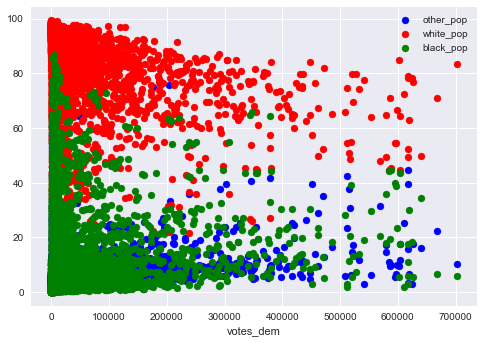

In [35]:
pop = vote_and_dem_data['white_pop'] + vote_and_dem_data['black_pop'] + vote_and_dem_data['other_pop']
vote_and_dem_data['white_pop'] = 100*vote_and_dem_data['white_pop']/pop
vote_and_dem_data['black_pop'] = 100*vote_and_dem_data['black_pop']/pop
vote_and_dem_data['other_pop'] = 100*vote_and_dem_data['other_pop']/pop
x,y_o, y_w, y_b = zip(*sorted(zip(vote_and_dem_data['votes_dem'], vote_and_dem_data['other_pop'],
                                  vote_and_dem_data['white_pop'], vote_and_dem_data['black_pop'])))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:-15],y_o[:-15], c = 'b' )
ax.scatter(x[:-15],y_w[:-15], c = 'r' )
ax.scatter(x[:-15],y_b[:-15], c = 'g' )
ax.legend(['other_pop', 'white_pop', 'black_pop'])
ax.set_xlabel('votes_dem')
plt.show()

In [36]:
final_df = pd.merge(abc.reset_index(),df, how = 'left', on = ['state', 'year']).fillna(0).drop(columns = ['votes_dem', 'votes_gop', 
                                                                                        'total_votes'])
final_df['white_pop'] = final_df['white_pop']/100000
final_df['black_pop'] = final_df['black_pop']/100000
final_df['other_pop'] = final_df['other_pop']/100000
final_df

state  year    dem_exp    rep_exp  votes_dem_perc  votes_gop_perc  \
0      AK  2012  20.535756   2.600446       40.812659       54.801577   
1      AK  2016  20.392580  15.725669       36.041373       50.566677   
2      AK  2020   0.003387   0.000008       39.199327       48.522791   
3      AL  2012   3.957966   3.119558       38.432866       60.662360   
4      AL  2016   0.609440   1.225656       34.358027       62.083003   
..    ...   ...        ...        ...             ...             ...   
148    WV  2016   6.387024   6.599431       26.476928       68.630575   
149    WV  2020  21.376201  16.185431       29.696521       68.631552   
150    WY  2012   0.000000   0.000000       27.818888       68.642622   
151    WY  2016   0.239063   0.000000       21.877357       68.172633   
152    WY  2020   0.078015   0.000000       26.553574       69.936227   

     white_pop  black_pop  other_pop  
0      2.03051    0.18547    0.85627  
1      1.96210    0.18680    0.91427  
2      0.00000    0.00000    0.00000  
3     33.71064   12.75628    1.68896  
4     33.74106   13.01635    1.87784  
..         ...        ...        ...  
148   17.14557    0.65227    0.51239  
149   16.75122    0.64610    0.52415  
150    5.37181    0.07671    0.31453  
151    5.42675    0.07326    0.34214  
152    5.35371    0.07467    0.35921  

[153 rows x 9 columns]

In [37]:
our_df = pd.merge(t_df,final_df,how = 'left', on = ['state', 'year'])
our_df

state  year       exp_amo  dem_comm_exp  rep_comm_exp  dem_adv_exp  \
0      AK  2012  2.770679e+06      0.001250      0.187345     0.168900   
1      AK  2016  3.611825e+07      1.190594      0.054232    18.304241   
2      AK  2020  2.959422e+07      0.592741      0.053296    16.017359   
3      AL  2012  7.077524e+06      0.685008      0.121581     3.060788   
4      AL  2016  1.835097e+06      0.000000      0.125222     0.609440   
..    ...   ...           ...           ...           ...          ...   
150    WV  2016  1.298645e+07      0.106648      0.209644     6.280354   
151    WV  2020  3.899817e+07      0.972211      0.409356    20.500467   
152    WY  2012  6.540259e+04      0.000000      0.003470     0.000000   
153    WY  2016  2.667167e+05      0.000033      0.008298     0.239030   
154    WY  2020  1.016250e+06      0.001415      0.498587     0.077200   

     rep_adv_exp  dem_research_exp  rep_research_exp  dem_others_exp  \
0       2.390737          0.000000          0.001297        0.000083   
1      15.435947          0.281613          0.022500        0.560096   
2       0.109322          0.001000          0.000000        0.000752   
3       2.925083          0.000000          0.064307        0.089999   
4       1.075110          0.000000          0.000000        0.000000   
..           ...               ...               ...             ...   
150     6.249936          0.000000          0.122096        0.000000   
151    15.692067          0.000000          0.059133        0.000000   
152     0.061908          0.000000          0.000000        0.000000   
153     0.018445          0.000000          0.000000        0.000000   
154     0.280952          0.000000          0.000000        0.001647   

     rep_others_exp  dem_logistics_exp  rep_logistic_exp    dem_exp  \
0          0.016543           0.000000          0.004524  20.535756   
1          0.132272           0.056037          0.080717  20.392580   
2          0.000000           0.000948          0.000000   0.003387   
3          0.008587           0.122172          0.000000   3.957966   
4          0.022935           0.000000          0.002390   0.609440   
..              ...                ...               ...        ...   
150        0.016348           0.000022          0.001406   6.387024   
151        0.026331           0.000000          0.009850  21.376201   
152        0.000025           0.000000          0.000000   0.000000   
153        0.000911           0.000000          0.000000   0.239063   
154        0.156450           0.000000          0.000000   0.078015   

       rep_exp  votes_dem_perc  votes_gop_perc  white_pop  black_pop  \
0     2.600446       40.812659       54.801577    2.03051    0.18547   
1    15.725669       36.041373       50.566677    1.96210    0.18680   
2     0.000008       39.199327       48.522791    0.00000    0.00000   
3     3.119558       38.432866       60.662360   33.71064   12.75628   
4     1.225656       34.358027       62.083003   33.74106   13.01635   
..         ...             ...             ...        ...        ...   
150   6.599431       26.476928       68.630575   17.14557    0.65227   
151  16.185431       29.696521       68.631552   16.75122    0.64610   
152   0.000000       27.818888       68.642622    5.37181    0.07671   
153   0.000000       21.877357       68.172633    5.42675    0.07326   
154   0.000000       26.553574       69.936227    5.35371    0.07467   

     other_pop  
0      0.85627  
1      0.91427  
2      0.00000  
3      1.68896  
4      1.87784  
..         ...  
150    0.51239  
151    0.52415  
152    0.31453  
153    0.34214  
154    0.35921  

[155 rows x 20 columns]

In [38]:
our_df.to_csv('expenditure_and_demographics.csv',index = False)

In [39]:
df = pd.read_csv('raw_data/merged.csv')
abb_ix = [us_state_abbrev[k] for k in df.state.values]
df['state'] = abb_ix
df2 = df[['year','state','votes_dem', 'votes_gop']].groupby(['state','year']).sum()
df2.sort_values(by = ['state','year'], inplace = True)
df2 = df2.drop([2000, 2004, 2008], level = 'year')
diff_df = df2.groupby(['state','year']).sum().diff()
diff_df['votes_dem_perc'] = 100*diff_df['votes_dem'][1:]/df2['votes_dem'].values[:-1]
diff_df['votes_gop_perc'] = 100*diff_df['votes_gop'][1:]/df2['votes_gop'].values[:-1]
diff_df = diff_df.dropna()
diff_df = diff_df.drop(2012, level = 'year')
diff_df.columns = [col + '_diff' for col in diff_df.columns]
diff_df = diff_df.drop(['votes_dem_diff','votes_gop_diff'], axis = 1)
diff_df = diff_df.reset_index()
diff_df

state  year  votes_dem_perc_diff  votes_gop_perc_diff
0      AK  2016            -5.044031            -0.782749
1      AK  2020            31.730125            16.222221
2      AL  2016            -8.313351             4.962478
3      AL  2020            16.462407             9.324332
4      AR  2016            -3.528064             5.731894
..    ...   ...                  ...                  ...
97     WI  2020            18.008819            14.641067
98     WV  2016           -20.764346            17.171110
99     WV  2020            24.995498            11.445509
100    WY  2016           -19.214560             2.022087
101    WY  2020            31.297233            10.973575

[102 rows x 4 columns]

In [49]:
diff_df2 = our_df.drop(columns = ['white_pop','black_pop',
                        'other_pop'], axis =1).groupby(['state','year']).sum().diff()
diff_df2 = diff_df2.dropna()
diff_df2 = diff_df2.drop(2012, level = 'year')
diff_df2.columns = [col + '_diff' for col in diff_df2.columns]
diff_df2 = diff_df2.reset_index()
diff_df2

state  year  exp_amo_diff  dem_comm_exp_diff  rep_comm_exp_diff  \
0      AK  2016  3.334757e+07           1.189344          -0.133113   
1      AK  2020 -6.524030e+06          -0.597853          -0.000936   
2      AL  2016 -5.242428e+06          -0.685008           0.003640   
3      AL  2020  2.625045e+07           0.747058           0.643873   
4      AR  2016  3.402685e+07          -0.135464           0.428545   
..    ...   ...           ...                ...                ...   
99     WI  2020  3.827340e+06          -0.258135          -0.494422   
100    WV  2016 -1.893954e+06          -0.064912           0.022237   
101    WV  2020  2.601172e+07           0.865563           0.199711   
102    WY  2016  2.013141e+05           0.000033           0.004828   
103    WY  2020  7.495335e+05           0.001382           0.490289   

     dem_adv_exp_diff  rep_adv_exp_diff  dem_research_exp_diff  \
0           18.135340         13.045210               0.281613   
1           -2.286882        -15.326625              -0.280613   
2           -2.451348         -1.849973               0.000000   
3           15.173325          8.456712               0.031118   
4           12.290116         21.184239              -0.202985   
..                ...               ...                    ...   
99           5.497009         -0.837693              -0.359741   
100         -0.065041         -1.808511               0.000000   
101         14.220113          9.442130               0.000000   
102          0.239030         -0.043463               0.000000   
103         -0.161830          0.262507               0.000000   

     rep_research_exp_diff  dem_others_exp_diff  rep_others_exp_diff  \
0                 0.021203             0.560013             0.115730   
1                -0.022500            -0.559344            -0.132272   
2                -0.064307            -0.089999             0.014348   
3                 0.085245             0.130605             0.473212   
4                 0.059150            -0.128597             0.331391   
..                     ...                  ...                  ...   
99                0.209102             0.148640            -0.055866   
100               0.044885            -0.001388             0.007653   
101              -0.062963             0.000000             0.009983   
102               0.000000             0.000000             0.000886   
103               0.000000             0.001647             0.155538   

     dem_logistics_exp_diff  rep_logistic_exp_diff  dem_exp_diff  \
0                  0.056037               0.076193     -0.143175   
1                 -0.055089              -0.080717    -20.389193   
2                 -0.122172               0.002390     -3.348526   
3                  0.437291               0.072008     13.572189   
4                 -0.013110               0.213564     11.809959   
..                      ...                    ...           ...   
99                 0.047733               0.004713     -3.777664   
100                0.000022              -0.028899     -0.131320   
101               -0.000022               0.008444     14.989177   
102                0.000000               0.000000      0.239063   
103                0.000000               0.000000     -0.161048   

     rep_exp_diff  votes_dem_perc_diff  votes_gop_perc_diff  
0       13.125223            -4.771286            -4.234901  
1      -15.725660             3.157955            -2.043886  
2       -1.893902            -4.074840             1.420643  
3        4.800813             2.212650            -0.052033  
4       22.216889            -3.203856             0.046784  
..            ...                  ...                  ...  
99      -6.282900             3.017938             1.632909  
100     -1.762634            -9.062270             6.334918  
101      9.586000             3.219593             0.000977  
102      0.000000            -5.941530            -0.469

In [67]:
final2_df = diff_df2.round(2)
final2_df

state  year  exp_amo_diff  dem_comm_exp_diff  rep_comm_exp_diff  \
0      AK  2016   33347569.34               1.19              -0.13   
1      AK  2020   -6524029.73              -0.60              -0.00   
2      AL  2016   -5242427.56              -0.69               0.00   
3      AL  2020   26250445.90               0.75               0.64   
4      AR  2016   34026848.66              -0.14               0.43   
..    ...   ...           ...                ...                ...   
99     WI  2020    3827340.04              -0.26              -0.49   
100    WV  2016   -1893954.28              -0.06               0.02   
101    WV  2020   26011715.78               0.87               0.20   
102    WY  2016     201314.15               0.00               0.00   
103    WY  2020     749533.47               0.00               0.49   

     dem_adv_exp_diff  rep_adv_exp_diff  dem_research_exp_diff  \
0               18.14             13.05                   0.28   
1               -2.29            -15.33                  -0.28   
2               -2.45             -1.85                   0.00   
3               15.17              8.46                   0.03   
4               12.29             21.18                  -0.20   
..                ...               ...                    ...   
99               5.50             -0.84                  -0.36   
100             -0.07             -1.81                   0.00   
101             14.22              9.44                   0.00   
102              0.24             -0.04                   0.00   
103             -0.16              0.26                   0.00   

     rep_research_exp_diff  dem_others_exp_diff  rep_others_exp_diff  \
0                     0.02                 0.56                 0.12   
1                    -0.02                -0.56                -0.13   
2                    -0.06                -0.09                 0.01   
3                     0.09                 0.13                 0.47   
4                     0.06                -0.13                 0.33   
..                     ...                  ...                  ...   
99                    0.21                 0.15                -0.06   
100                   0.04                -0.00                 0.01   
101                  -0.06                 0.00                 0.01   
102                   0.00                 0.00                 0.00   
103                   0.00                 0.00                 0.16   

     dem_logistics_exp_diff  rep_logistic_exp_diff  dem_exp_diff  \
0                      0.06                   0.08         -0.14   
1                     -0.06                  -0.08        -20.39   
2                     -0.12                   0.00         -3.35   
3                      0.44                   0.07         13.57   
4                     -0.01                   0.21         11.81   
..                      ...                    ...           ...   
99                     0.05                   0.00         -3.78   
100                    0.00                  -0.03         -0.13   
101                   -0.00                   0.01         14.99   
102                    0.00                   0.00          0.24   
103                    0.00                   0.00         -0.16   

     rep_exp_diff  votes_dem_perc_diff  votes_gop_perc_diff  
0           13.13                -4.77                -4.23  
1          -15.73                 3.16                -2.04  
2           -1.89                -4.07                 1.42  
3            4.80                 2.21                -0.05  
4           22.22                -3.20                 0.05  
..            ...                  ...                  ...  
99          -6.28                 3.02                 1.63  
100         -1.76                -9.06                 6.33  
101          9.59                 3.22                 0.00  
102          0.00                -5.94                -0

In [68]:
df2 = df2.reset_index()
df2['winner'] = np.where(df2['votes_dem']>df2['votes_gop'], 'DEMOCRATS','REPUBLICANS')
df2

level_0  index state  year  votes_dem  votes_gop       winner
0          0      0    AK  2012   122640.0   164676.0  REPUBLICANS
1          1      1    AK  2016   116454.0   163387.0  REPUBLICANS
2          2      2    AK  2020   153405.0   189892.0  REPUBLICANS
3          3      3    AL  2012   795696.0  1255925.0  REPUBLICANS
4          4      4    AL  2016   729547.0  1318250.0  REPUBLICANS
..       ...    ...   ...   ...        ...        ...          ...
148      148    148    WV  2016   188794.0   489371.0  REPUBLICANS
149      149    149    WV  2020   235984.0   545382.0  REPUBLICANS
150      150    150    WY  2012    69286.0   170962.0  REPUBLICANS
151      151    151    WY  2016    55973.0   174419.0  REPUBLICANS
152      152    152    WY  2020    73491.0   193559.0  REPUBLICANS

[153 rows x 7 columns]

In [69]:
final2_df.merge(df2[df2['year']!= 2012][['state','year','winner']], how= 'left', on = ['state', 'year']).to_csv('final2_df.csv',index = False)

In [70]:
final2_df = pd.read_csv('final2_df.csv')
final2_df

state  year  exp_amo_diff  dem_comm_exp_diff  rep_comm_exp_diff  \
0      AK  2016   33347569.34               1.19              -0.13   
1      AK  2020   -6524029.73              -0.60              -0.00   
2      AL  2016   -5242427.56              -0.69               0.00   
3      AL  2020   26250445.90               0.75               0.64   
4      AR  2016   34026848.66              -0.14               0.43   
..    ...   ...           ...                ...                ...   
99     WI  2020    3827340.04              -0.26              -0.49   
100    WV  2016   -1893954.28              -0.06               0.02   
101    WV  2020   26011715.78               0.87               0.20   
102    WY  2016     201314.15               0.00               0.00   
103    WY  2020     749533.47               0.00               0.49   

     dem_adv_exp_diff  rep_adv_exp_diff  dem_research_exp_diff  \
0               18.14             13.05                   0.28   
1               -2.29            -15.33                  -0.28   
2               -2.45             -1.85                   0.00   
3               15.17              8.46                   0.03   
4               12.29             21.18                  -0.20   
..                ...               ...                    ...   
99               5.50             -0.84                  -0.36   
100             -0.07             -1.81                   0.00   
101             14.22              9.44                   0.00   
102              0.24             -0.04                   0.00   
103             -0.16              0.26                   0.00   

     rep_research_exp_diff  dem_others_exp_diff  rep_others_exp_diff  \
0                     0.02                 0.56                 0.12   
1                    -0.02                -0.56                -0.13   
2                    -0.06                -0.09                 0.01   
3                     0.09                 0.13                 0.47   
4                     0.06                -0.13                 0.33   
..                     ...                  ...                  ...   
99                    0.21                 0.15                -0.06   
100                   0.04                -0.00                 0.01   
101                  -0.06                 0.00                 0.01   
102                   0.00                 0.00                 0.00   
103                   0.00                 0.00                 0.16   

     dem_logistics_exp_diff  rep_logistic_exp_diff  dem_exp_diff  \
0                      0.06                   0.08         -0.14   
1                     -0.06                  -0.08        -20.39   
2                     -0.12                   0.00         -3.35   
3                      0.44                   0.07         13.57   
4                     -0.01                   0.21         11.81   
..                      ...                    ...           ...   
99                     0.05                   0.00         -3.78   
100                    0.00                  -0.03         -0.13   
101                   -0.00                   0.01         14.99   
102                    0.00                   0.00          0.24   
103                    0.00                   0.00         -0.16   

     rep_exp_diff  votes_dem_perc_diff  votes_gop_perc_diff       winner  
0           13.13                -4.77                -4.23  REPUBLICANS  
1          -15.73                 3.16                -2.04  REPUBLICANS  
2           -1.89                -4.07                 1.42  REPUBLICANS  
3            4.80                 2.21                -0.05  REPUBLICANS  
4           22.22                -3.20                 0.05  REPUBLICANS  
..            ...                  ...                  ...          ...  
99          -6.28                 3.02                 1.63    DEMOCRATS  
100         -1.76                -9.06                 6.33  REPUBLICANS  
1

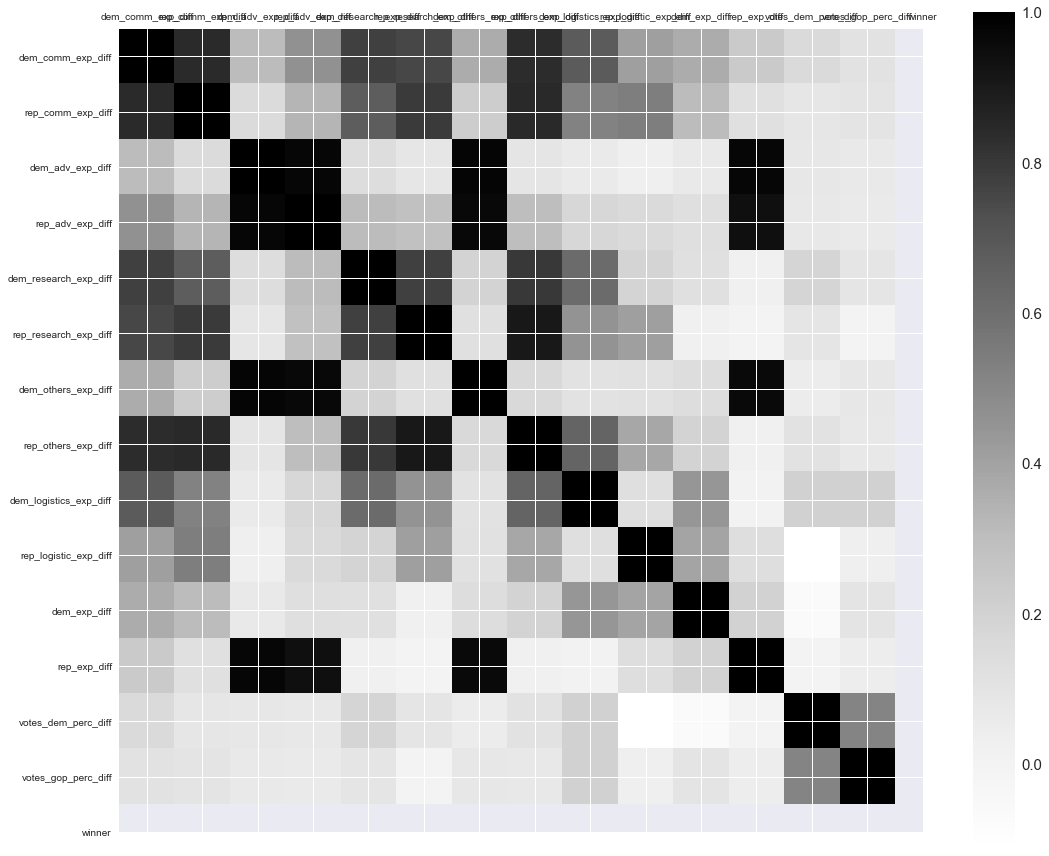

In [71]:
f = plt.figure(figsize = (18,15))
plt.matshow(final2_df.drop(columns = ['exp_amo_diff','state','year']).corr(), fignum = f.number)
plt.xticks(np.arange(15), final2_df.drop(columns = ['exp_amo_diff','state','year']).columns)
plt.yticks(np.arange(15), final2_df.drop(columns = ['exp_amo_diff','state','year']).columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 15)
plt.show()

In [72]:
final2_df.drop(columns = ['exp_amo_diff','state','year']).corr()

dem_comm_exp_diff  rep_comm_exp_diff  \
dem_comm_exp_diff                1.000000           0.841166   
rep_comm_exp_diff                0.841166           1.000000   
dem_adv_exp_diff                 0.305570           0.148121   
rep_adv_exp_diff                 0.462897           0.333576   
dem_research_exp_diff            0.778090           0.671835   
rep_research_exp_diff            0.755173           0.791507   
dem_others_exp_diff              0.363967           0.223122   
rep_others_exp_diff              0.834781           0.843612   
dem_logistics_exp_diff           0.681012           0.521267   
rep_logistic_exp_diff            0.411563           0.538374   
dem_exp_diff                     0.361344           0.306495   
rep_exp_diff                     0.234722           0.124149   
votes_dem_perc_diff              0.152071           0.086481   
votes_gop_perc_diff              0.112228           0.097102   

                        dem_adv_exp_diff  rep_adv_exp_diff  \
dem_comm_exp_diff               0.305570          0.462897   
rep_comm_exp_diff               0.148121          0.333576   
dem_adv_exp_diff                1.000000          0.972227   
rep_adv_exp_diff                0.972227          1.000000   
dem_research_exp_diff           0.136914          0.306784   
rep_research_exp_diff           0.084970          0.283119   
dem_others_exp_diff             0.974829          0.965530   
rep_others_exp_diff             0.092998          0.295662   
dem_logistics_exp_diff          0.061316          0.177620   
rep_logistic_exp_diff           0.029143          0.153741   
dem_exp_diff                    0.068168          0.127566   
rep_exp_diff                    0.970972          0.942605   
votes_dem_perc_diff             0.077334          0.069528   
votes_gop_perc_diff             0.069128          0.058735   

                        dem_research_exp_diff  rep_research_exp_diff  \
dem_comm_exp_diff                    0.778090               0.755173   
rep_comm_exp_diff                    0.671835               0.791507   
dem_adv_exp_diff                     0.136914               0.084970   
rep_adv_exp_diff                     0.306784               0.283119   
dem_research_exp_diff                1.000000               0.776997   
rep_research_exp_diff                0.776997               1.000000   
dem_others_exp_diff                  0.194039               0.125225   
rep_others_exp_diff                  0.798743               0.906729   
dem_logistics_exp_diff               0.616663               0.453359   
rep_logistic_exp_diff                0.187817               0.408848   
dem_exp_diff                         0.120613               0.018473   
rep_exp_diff                         0.022337              -0.002812   
votes_dem_perc_diff                  0.186292               0.094568   
votes_gop_perc_diff                  0.091561              -0.002304   

                        dem_others_exp_diff  rep_others_exp_diff  \
dem_comm_exp_diff                  0.363967             0.834781   
rep_comm_exp_diff                  0.223122             0.843612   
dem_adv_exp_diff                   0.974829             0.092998   
rep_adv_exp_diff                   0.965530             0.295662   
dem_research_exp_diff              0.194039             0.798743   
rep_research_exp_diff              0.125225             0.906729   
dem_others_exp_diff                1.000000             0.164529   
rep_others_exp_diff                0.164529             1.000000   
dem_logistics_exp_diff             0.105879             0.641749   
rep_logistic_exp_diff              0.114784             0.380617   
dem_exp_diff                       0.142932             0.193552   
rep_exp_diff                       0.964529             0.024690   
votes_dem_perc_diff                0.051107             0.106222   
votes_gop_perc_diff                0.074825             0.071307   

                        dem_lo

In [73]:
final2_df.columns

Index(['state', 'year', 'exp_amo_diff', 'dem_comm_exp_diff',
       'rep_comm_exp_diff', 'dem_adv_exp_diff', 'rep_adv_exp_diff',
       'dem_research_exp_diff', 'rep_research_exp_diff', 'dem_others_exp_diff',
       'rep_others_exp_diff', 'dem_logistics_exp_diff',
       'rep_logistic_exp_diff', 'dem_exp_diff', 'rep_exp_diff',
       'votes_dem_perc_diff', 'votes_gop_perc_diff', 'winner'],
      dtype='object')

In [74]:
final2_df.columns = ['State', 'Year',
       'Total Exp Diff', 'Democrats Communications Exp Diff', 'Republicans Communications Exp Diff',
       'Democrats Advertisement Exp Diff', 'Republicans Advertisement Exp Diff', 'Democrats Research Exp Diff',
       'Republicans Research Exp Diff', 'Democrats Others Exp Diff', 'Republicans Others Exp Diff',
       'Democrats Logistics Exp Diff', 'Republicans Logistics Exp Diff', 'Democrats Exp Diff',
       'Republicans Exp Diff', 'Democrats Votes Diff % ', 'Republicans Votes Diff % ','Winner']

In [75]:
import plotly.express as px

In [76]:
final2_df['Democrats ROI'] = np.nan_to_num(np.where(
    final2_df['Democrats Votes Diff % ']>0,abs(final2_df['Democrats Votes Diff % ']/final2_df['Democrats Exp Diff']),
    final2_df['Democrats Votes Diff % ']/final2_df['Democrats Exp Diff']), neginf = -10, posinf = 10).round(2)
final2_df['Republicans ROI'] = np.nan_to_num(np.where(
    final2_df['Republicans Votes Diff % ']>0,abs(final2_df['Republicans Votes Diff % ']/final2_df['Republicans Exp Diff']),
    final2_df['Republicans Votes Diff % ']/final2_df['Republicans Exp Diff']), neginf = -10, posinf = 10).round(2)
final2_df

State  Year  Total Exp Diff  Democrats Communications Exp Diff  \
0      AK  2016     33347569.34                               1.19   
1      AK  2020     -6524029.73                              -0.60   
2      AL  2016     -5242427.56                              -0.69   
3      AL  2020     26250445.90                               0.75   
4      AR  2016     34026848.66                              -0.14   
..    ...   ...             ...                                ...   
99     WI  2020      3827340.04                              -0.26   
100    WV  2016     -1893954.28                              -0.06   
101    WV  2020     26011715.78                               0.87   
102    WY  2016       201314.15                               0.00   
103    WY  2020       749533.47                               0.00   

     Republicans Communications Exp Diff  Democrats Advertisement Exp Diff  \
0                                  -0.13                             18.14   
1                                  -0.00                             -2.29   
2                                   0.00                             -2.45   
3                                   0.64                             15.17   
4                                   0.43                             12.29   
..                                   ...                               ...   
99                                 -0.49                              5.50   
100                                 0.02                             -0.07   
101                                 0.20                             14.22   
102                                 0.00                              0.24   
103                                 0.49                             -0.16   

     Republicans Advertisement Exp Diff  Democrats Research Exp Diff  \
0                                 13.05                         0.28   
1                                -15.33                        -0.28   
2                                 -1.85                         0.00   
3                                  8.46                         0.03   
4                                 21.18                        -0.20   
..                                  ...                          ...   
99                                -0.84                        -0.36   
100                               -1.81                         0.00   
101                                9.44                         0.00   
102                               -0.04                         0.00   
103                                0.26                         0.00   

     Republicans Research Exp Diff  Democrats Others Exp Diff  \
0                             0.02                       0.56   
1                            -0.02                      -0.56   
2                            -0.06                      -0.09   
3                             0.09                       0.13   
4                             0.06                      -0.13   
..                             ...                        ...   
99                            0.21                       0.15   
100                           0.04                      -0.00   
101                          -0.06                       0.00   
102                           0.00                       0.00   
103                           0.00                       0.00   

     Republicans Others Exp Diff  Democrats Logistics Exp Diff  \
0                           0.12                          0.06   
1                          -0.13                         -0.06   
2                           0.01                         -0.12   
3                           0.47                          0.44   
4                           0.33                         -0.01   
..                           ...                           ...   
99                         -0.06                          0.05   
100                         0.01                    

In [77]:
final2_df.to_csv('final2_df.csv',index = False)

In [60]:
fig = px.choropleth(final2_df[(final2_df['Republicans Votes Diff % ']<0) & (final2_df['State']!='NH')], locations= 'State',
              locationmode='USA-states',
                    hover_name= 'Winner',
              hover_data = ['Republicans ROI','Republicans Votes Diff % ', "Republicans Exp Diff",
                        "Democrats Exp Diff"],
              scope = 'usa',
              animation_frame='Year',
              animation_group='State',
              color = "Republicans Exp Diff")
fig.update_layout(title={'text' : f'US Republicans Vote Difference vs Expenses ($ Millions)','x':0.5, 'xanchor': 'center'})
fig.show()

In [61]:
fig = px.choropleth(final2_df[final2_df['Democrats Votes Diff % ']>0], locations= 'State',
              locationmode='USA-states',
                    hover_name= 'Winner',
              hover_data = ['Democrats ROI','Democrats Votes Diff % ', "Republicans Exp Diff",
                        "Democrats Exp Diff"],
              scope = 'usa',
              animation_frame='Year',
              animation_group='State',
              color = "Democrats Exp Diff")
fig.update_layout(title={'text' : f'US Republicans Vote Difference vs Expenses ($ Millions)','x':0.5, 'xanchor': 'center'})
fig.show()